# EDA & PRE-PROCESSING

# EDA

## Import libraries and load dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from nltk.util import ngrams
from collections import Counter
import string
from wordcloud import WordCloud

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load dataset
dataset = pd.read_excel("Inshorts_Cleaned_Data.xlsx")
print('Done!')

Done!


In [ ]:
# Removing the space in column names
dataset = dataset.rename(columns={'Source ': 'Source', 'Time ': 'Time'})

## Overview of data

In [ ]:
print(dataset.shape)

(55104, 5)


In [ ]:
dataset.head()

,Headline,Short,Source,Time,Publish Date
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...,The New Indian Express,09:25:00,2017-03-26
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...,Outlook,22:18:00,2017-03-25
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a...",Hindustan Times,23:39:00,2017-03-25
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...,Livemint,23:08:00,2017-03-25
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...,YouTube,23:24:00,2017-03-25


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55104 entries, 0 to 55103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Headline      55104 non-null  object        
 1   Short         55104 non-null  object        
 2   Source        55104 non-null  object        
 3   Time          55104 non-null  object        
 4   Publish Date  55104 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 2.1+ MB


## Duplicates

In [ ]:
dataset.describe()

<ipython-input-111-3ded4c85834d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.describe()


,Headline,Short,Source,Time,Publish Date
count,55104,55104,55104,55104,55104
unique,54940,54997,1471,1405,433
top,"Sensex, Nifty end on a flat note",Actor Farhan Akhtar and singers Vishal Dadlani...,YouTube,10:00:00,2016-10-11 00:00:00
freq,9,3,4693,127,236
first,NaN,NaN,NaN,NaN,2016-01-19 00:00:00
last,NaN,NaN,NaN,NaN,2017-03-26 00:00:00


In [ ]:
# Show duplicate rows based on 'Headline' and 'Short'
duplicate_rows = dataset[dataset.duplicated(subset=['Headline', 'Short'], keep=False)]

# Display the result
print(duplicate_rows)

                                                Headline  \
693    American Express raises CEO&#39;s pay to ₹144 ...   
717    American Express raises CEO&#39;s pay to ₹144 ...   
2195   Justice Karnan orders CBI inquiry against Supr...   
2200   New wave of feminism is aggressive and destruc...   
2203   By 2024, India would be prosperous nation: Rijiju   
...                                                  ...   
43969    Tech giants pledge to tackle online hate speech   
44168  Nest&#39;s Co-founder Fadell develops smart go...   
44179    Public sector banks install 14k ATMs in 2015-16   
44183  Nest&#39;s Co-founder Fadell develops smart go...   
44188    Public sector banks install 14k ATMs in 2015-16   

                                                   Short           Source  \
693    American Express, the biggest credit-card issu...        Bloomberg   
717    American Express, the biggest credit-card issu...        Bloomberg   
2195   Calcutta High Court Justice CS Karnan has

## Source analysis

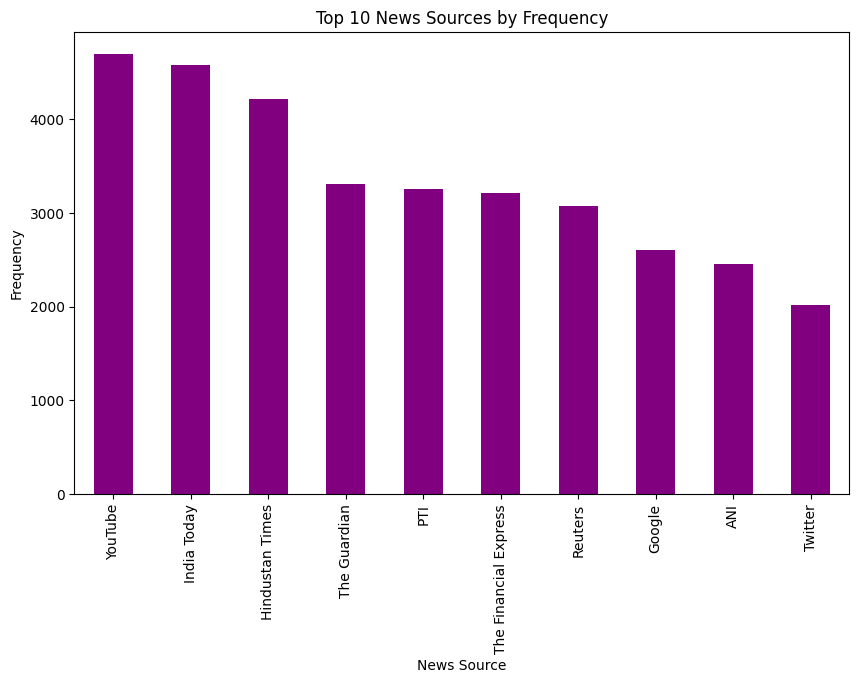

In [ ]:
# Frequency of Each News Source
source_counts = dataset['Source'].astype('category').value_counts().head(10)

plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='purple')
plt.title('Top 10 News Sources by Frequency')
plt.xlabel('News Source')
plt.ylabel('Frequency')
plt.show()

## Time analysis

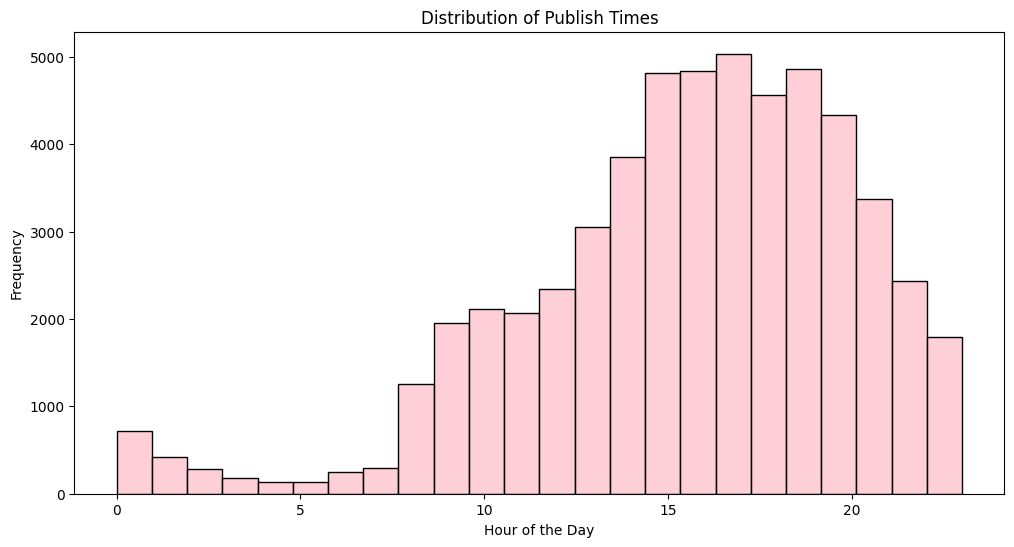

In [ ]:
# Distribution of Publish Times
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S')

plt.figure(figsize=(12, 6))
sns.histplot(dataset['Time'].dt.hour, bins=24, kde=False, color='pink')
plt.title('Distribution of Publish Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

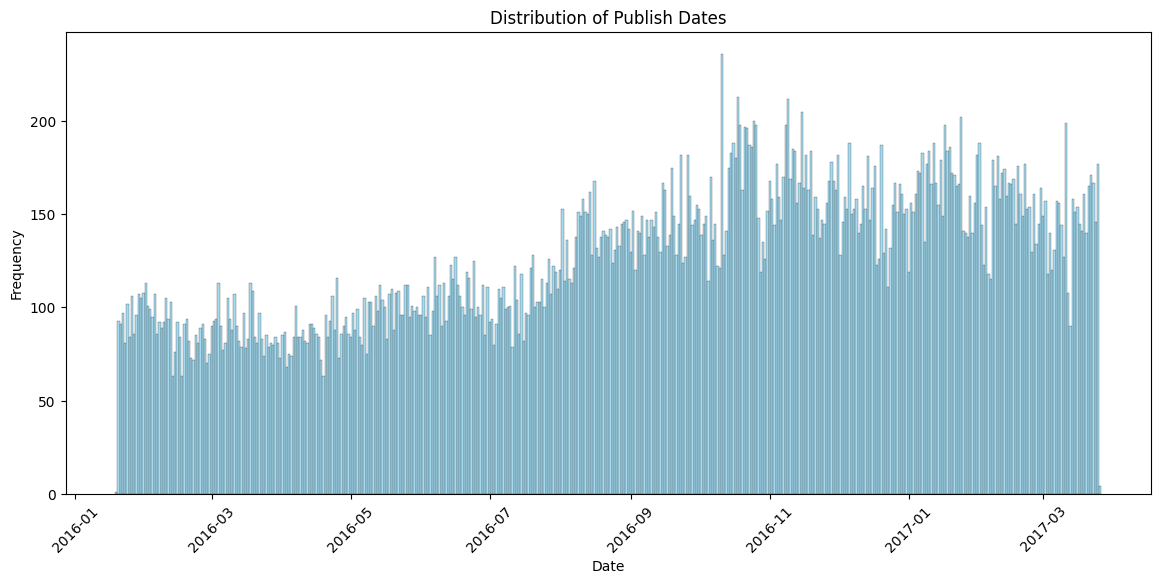

In [ ]:
# Distribution of Publish Dates
plt.figure(figsize=(14, 6))

sns.histplot(dataset['Publish Date'].dt.date, bins=len(dataset['Publish Date'].dt.date.unique()), kde=False, color='skyblue')
plt.title('Distribution of Publish Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Word cloud (without stopwords)

In [ ]:
def generateWordCloudInTimePeriod(dataset, type, start_date, end_date, color):
    # Filter dataset based on the specified time period
    filtered_data = dataset[(dataset['Publish Date'] >= start_date) & (dataset['Publish Date'] <= end_date)]

    # Concatenate the text data for the specified time period
    if type == 'Short':
        text_data = filtered_data['Short'].astype(str).str.cat(sep=' ')
    else:
        text_data = filtered_data['Headline'].astype(str).str.cat(sep=' ')

    stopwords_set = set(stopwords.words('english'))
    stopwords_set.update(list(string.punctuation))

    # Generate the word cloud
    wordcloud = WordCloud(width=5000, height=4000,
                          background_color='white',
                          stopwords=stopwords_set,
                          min_font_size=10, colormap=color, random_state=24).generate(text_data)

    # Display the generated word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

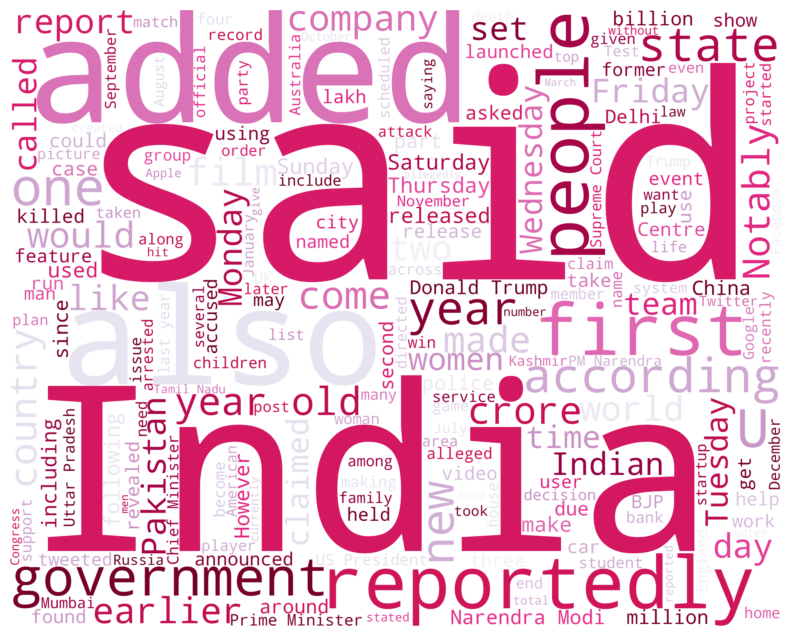

In [ ]:
generateWordCloudInTimePeriod(dataset, 'Short', '2016-06-01', '2017-03-31', 'PuRd')

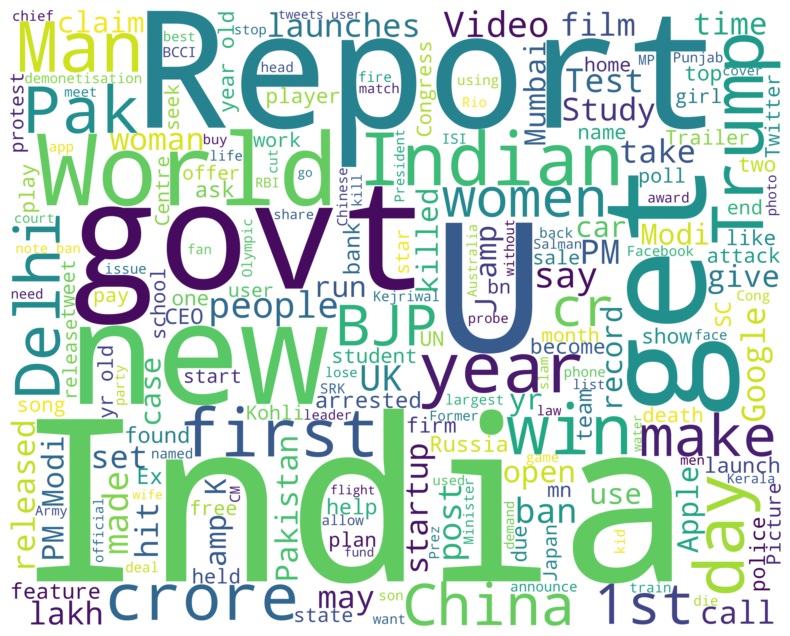

In [ ]:
generateWordCloudInTimePeriod(dataset, 'Headline', '2016-06-01', '2017-03-31', 'viridis')

## Average, min, max text length of 'Headline' and 'Short'

In [ ]:
# Calculate the average number of words in 'Headline' & 'Short'
avgWordH = dataset['Headline'].apply(lambda x: len(x.split())).mean()
avgWordS = dataset['Short'].apply(lambda x: len(x.split())).mean()

# Calculate the minimum number of words in 'Headline' & 'Short'
minWordH = dataset['Headline'].apply(lambda x: len(x.split())).min()
minWordS = dataset['Short'].apply(lambda x: len(x.split())).min()

# Calculate the maximum number of words in 'Headline' & 'Short'
maxWordH = dataset['Headline'].apply(lambda x: len(x.split())).max()
maxWordS = dataset['Short'].apply(lambda x: len(x.split())).max()

print(f'The average number of words in target summary is: {avgWordH:.2f} words')
print(f'The minimum number of words in target summary is: {minWordH} words')
print(f'The maximum number of words in target summary is: {maxWordH} words')

print(f'\nThe average number of words in input text is: {avgWordS:.2f} words')
print(f'The minimum number of words in input text is: {minWordS} words')
print(f'The maximum number of words in input text is: {maxWordS} words')

# minWordH_index = dataset['Headline'].apply(lambda x: len(x.split())).idxmin()
# minWordH_text = dataset.loc[minWordH_index, 'Headline']
# print(f'The minimum number of words in target summary is: {minWordH_text} ({minWordH} words)')
# row_with_newline = dataset.loc[minWordH_index]
# print(f'Headline Entry:\n{row_with_newline["Headline"]}\n')
# short_tokens = row_with_newline["Short"].split()[:10]
# print(f'Short Entry (up to 10 tokens):\n{" ".join(short_tokens)} ...')

# print(row_with_newline[["Headline"]])

headlines_with_min_word_count = dataset[dataset['Headline'].apply(lambda x: len(x.split())) == minWordH]

# Print the other headlines
for index, row in headlines_with_min_word_count.iterrows():
    short_tokens = row["Short"].split()[:10]
    print(f'\nRow Index: {index}\nHeadline Entry:\n{row["Headline"]}\nShort Entry:\n{" ".join(short_tokens)} ...')

The average number of words in target summary is: 8.26 words
The minimum number of words in target summary is: 1 words
The maximum number of words in target summary is: 14 words

The average number of words in input text is: 58.18 words
The minimum number of words in input text is: 40 words
The maximum number of words in input text is: 67 words

Row Index: 13182
Headline Entry:
\n      
Short Entry:
Criticising PM Modi&#39;s address to the nation, Congress spokesperson RS ...

Row Index: 18056
Headline Entry:
\n      
Short Entry:
Arjun Kapoor has called a Hindi daily&#39;s headline &#34;insensitive&#34;. The ...

Row Index: 36045
Headline Entry:
\n      
Short Entry:
Facebook has built a new algorithm that will make clickbait ...


## Distribution of metafeatures

In [ ]:
def create_text_features(data, column_name):
    data[f'{column_name}_word_count'] = data[column_name].apply(lambda x: len(str(x).split()))
    data[f'{column_name}_unique_word_count'] = data[column_name].apply(lambda x: len(set(str(x).split())))
    data[f'{column_name}_stop_word_count'] = data[column_name].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
    data[f'{column_name}_url_count'] = data[column_name].apply(lambda x: len([w for w in str(x).lower().split() if 'http:' in w or 'https:' in w]))
    data[f'{column_name}_mean_word_length'] = data[column_name].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    data[f'{column_name}_char_count'] = data[column_name].apply(lambda x: len(str(x)))
    data[f'{column_name}_punctuation_count'] = data[column_name].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Apply to 'Headline'
create_text_features(dataset, 'Headline')

# Apply to 'Short'
create_text_features(dataset, 'Short')

<ipython-input-123-21ef7ce10994>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dataset, x=f'Headline_{feature}', label='Headline', color='green', fill=True, ax=axes[i])
<ipython-input-123-21ef7ce10994>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dataset, x=f'Short_{feature}', label='Short', color='red', fill=True, ax=axes[i])


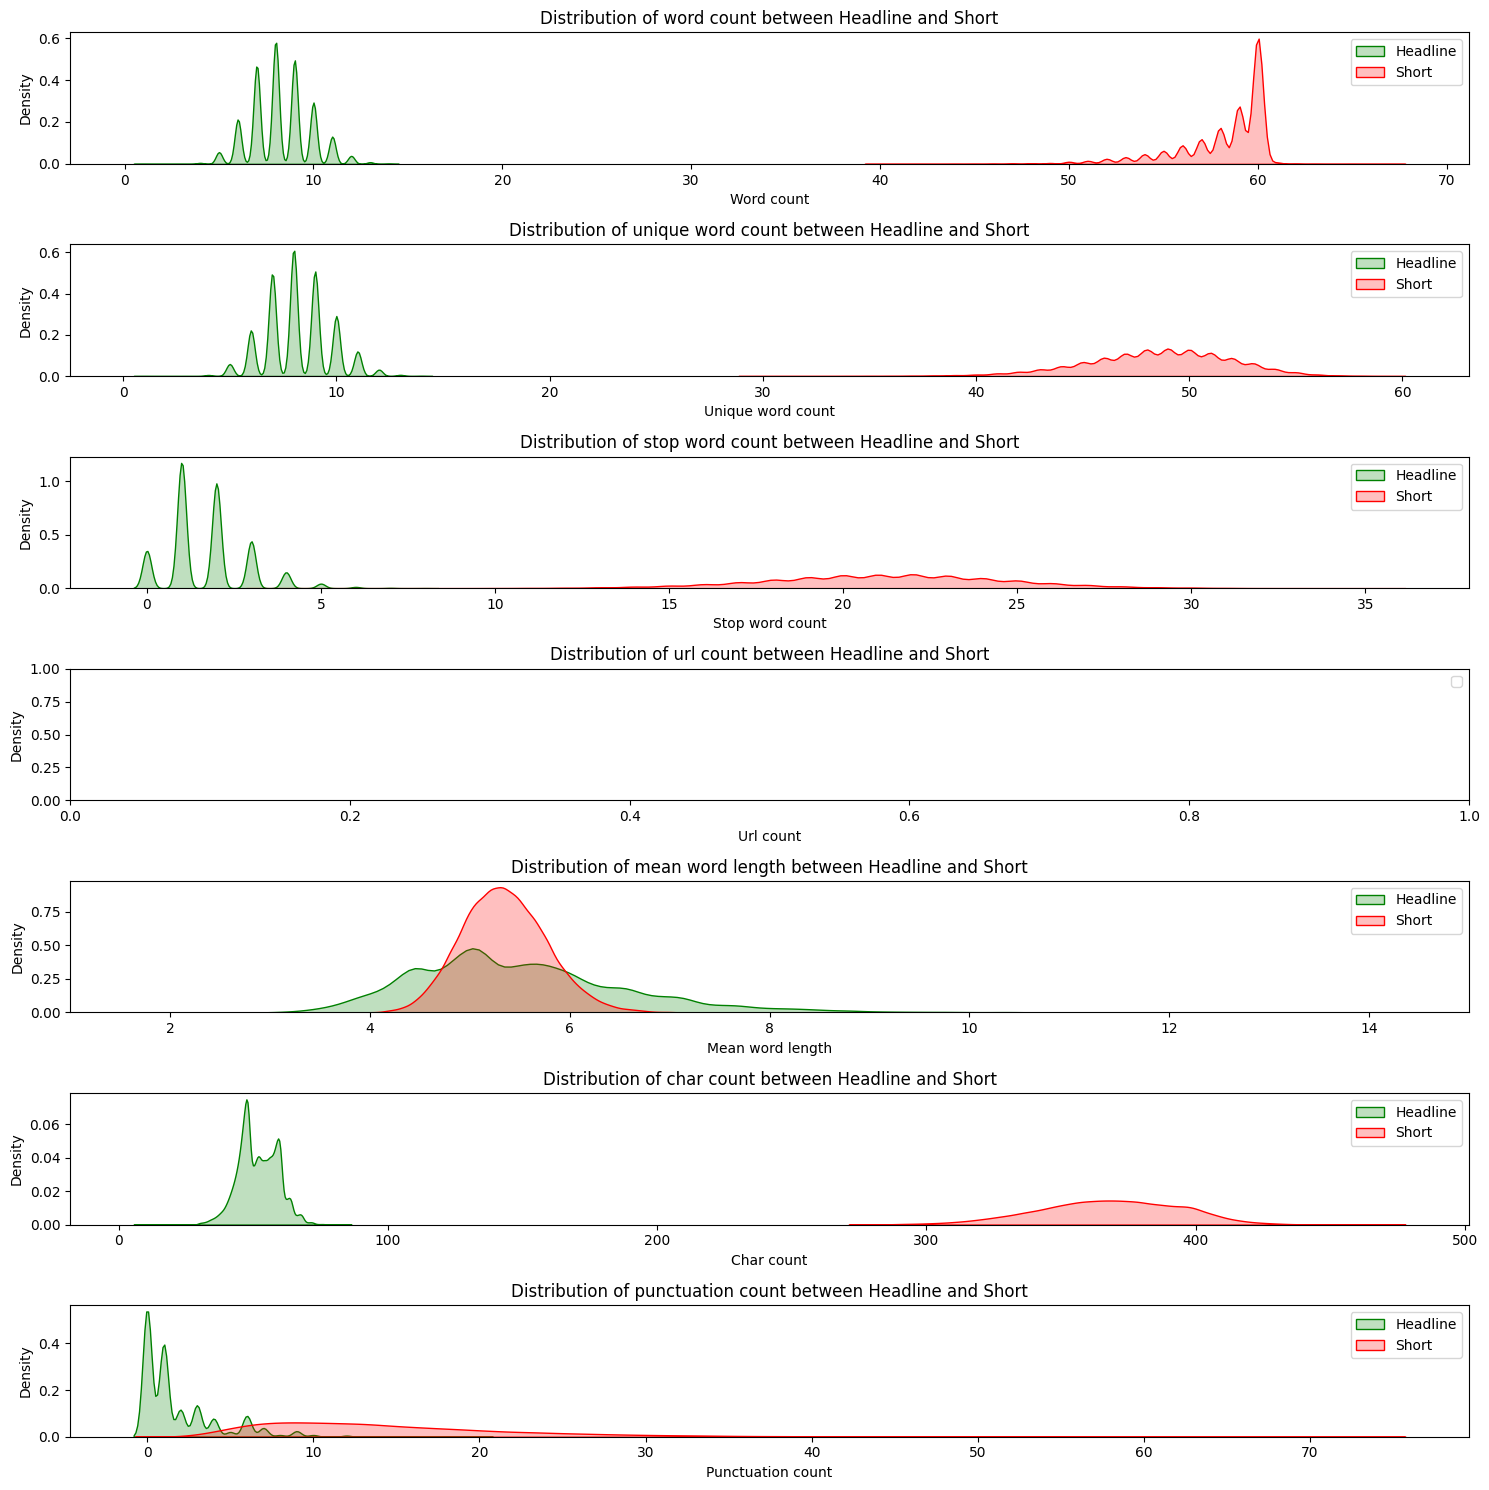

In [ ]:
features = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
            'char_count', 'punctuation_count']

# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(15, 15))

# Plot distributions on the same figure using kdeplot
for i, feature in enumerate(features):
    sns.kdeplot(data=dataset, x=f'Headline_{feature}', label='Headline', color='green', fill=True, ax=axes[i])
    sns.kdeplot(data=dataset, x=f'Short_{feature}', label='Short', color='red', fill=True, ax=axes[i])

    # Customize the plot
    featureName = feature.replace('_', ' ')
    axes[i].set_title(f'Distribution of {featureName} between Headline and Short')
    axes[i].set_xlabel(featureName.capitalize())
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

## N-gram analysis

(54535, 2)
(253888, 2)
(313606, 2)


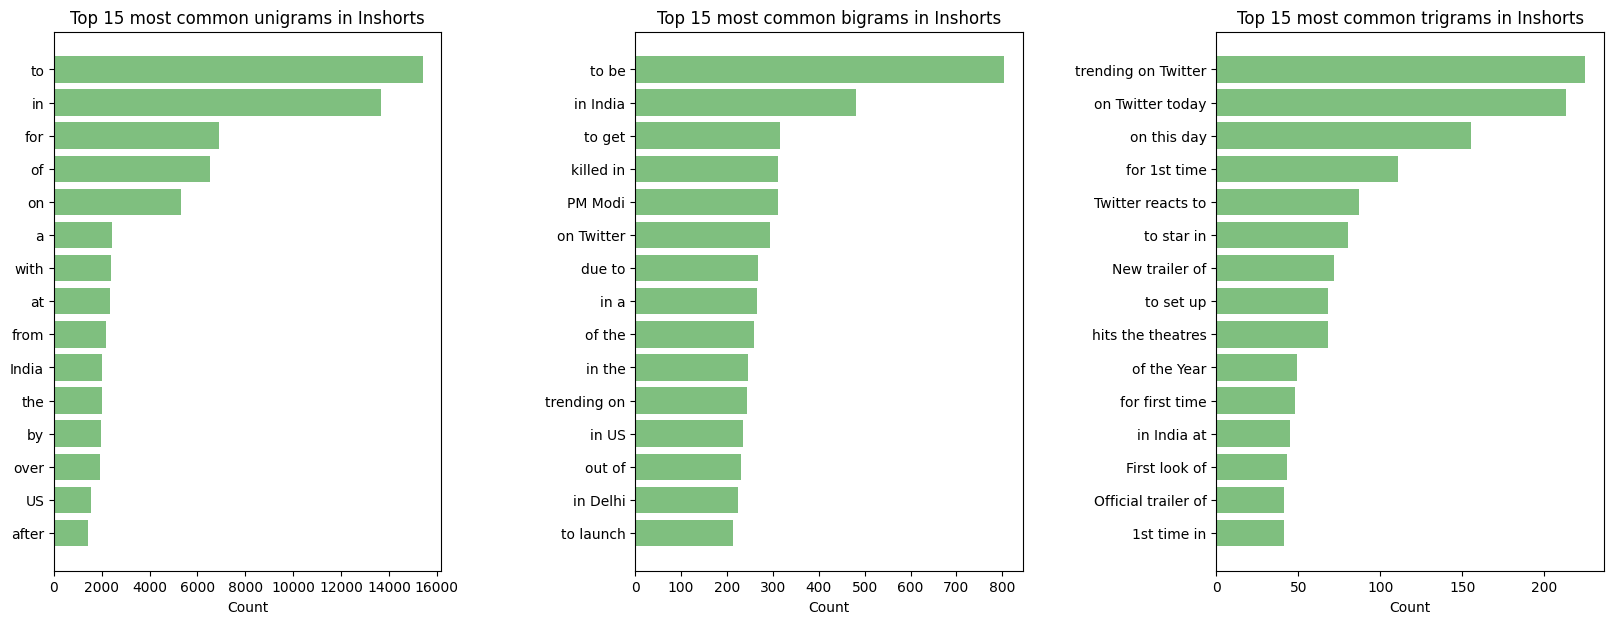

(193348, 2)
(1201913, 2)
(2243461, 2)


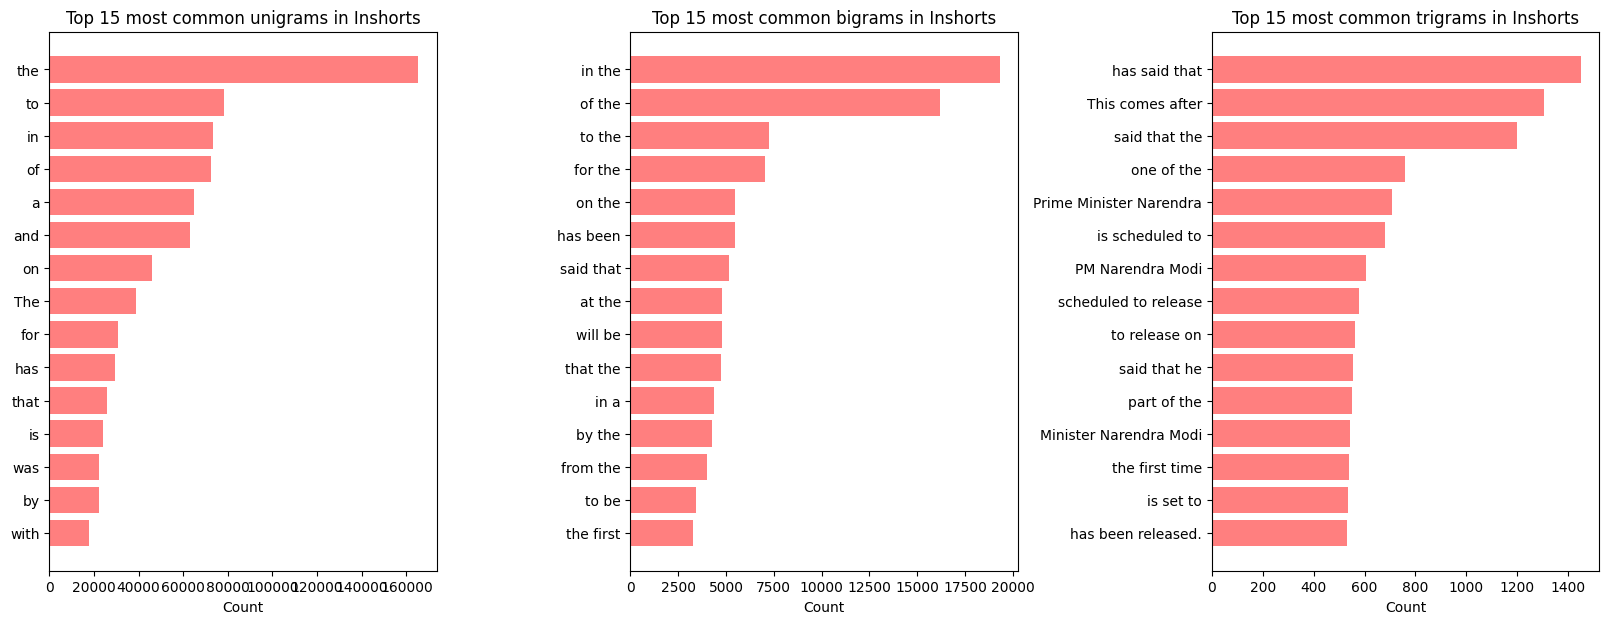

In [ ]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    print(df.shape)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

def plotNgrams(documents, color):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)

    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5, color=color)
    ax.set_title('Top 15 most common unigrams in Inshorts')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5, color=color)
    ax2.set_title('Top 15 most common bigrams in Inshorts')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5, color=color)
    ax3.set_title('Top 15 most common trigrams in Inshorts')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

# documentNgrams(dataset['Headline'],3)
plotNgrams(dataset['Headline'],'green')

# For 'Headline'
# Before pre-processing, total unique unigram, bigram and trigram was found to be 54,535, 253,888, and 313,606, respectively.

plotNgrams(dataset['Short'],'red')
# For 'Short'
# Before pre-processing, total unique unigram, bigram and trigram was found to be 193,348, 1,201,913, and 2,243,461, respectively.

# Pre-Processing

## Drop unused columns

In [ ]:
cleanDf = dataset.iloc[:, :2]
cleanDf.head()

,Headline,Short
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a..."
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...


## Lowercasing

In [ ]:
cleanDf = cleanDf.applymap(lambda x: x.lower() if isinstance(x, str) else x)

cleanDf.head()

,Headline,Short
0,4 ex-bank officials booked for cheating bank o...,the cbi on saturday booked four former officia...
1,supreme court to go paperless in 6 months: cji,chief justice js khehar has said the supreme c...
2,"at least 3 killed, 30 injured in blast in sylh...","at least three people were killed, including a..."
3,why has reliance been barred from trading in f...,mukesh ambani-led reliance industries (ril) wa...
4,was stopped from entering my own studio at tim...,tv news anchor arnab goswami has said he was t...


## Remove duplicates

In [ ]:
# Drop all duplicates to avoid training bias
cleanDf = cleanDf.drop_duplicates(subset=['Headline', 'Short'], keep='first')
cleanDf = cleanDf.drop_duplicates(subset=['Short'], keep='first')
cleanDf = cleanDf.drop_duplicates(subset=['Headline'], keep='first')

cleanDf.describe()

,Headline,Short
count,54938,54938
unique,54938,54938
top,4 ex-bank officials booked for cheating bank o...,the cbi on saturday booked four former officia...
freq,1,1


### Visualize duplications

In [ ]:
# Drop duplicates based on both 'Headline' and 'Short'
cleanDf2 = dataset.drop_duplicates(subset=['Headline', 'Short'], keep='first')
cleanDf2 = cleanDf2.iloc[:, :2]
cleanDf2.describe()

,Headline,Short
count,54998,54998
unique,54940,54997
top,"Sensex, Nifty end on a flat note",British automaker Aston Martin has launched lu...
freq,9,2


In [ ]:
# Show duplicate rows based on 'Short' only
duplicateShort = cleanDf2[cleanDf2.duplicated(subset=['Short'], keep=False)]

# Display the result
print(duplicateShort)

                                                Headline  \
26398  In Pictures: Aston Martin DB11 launched in Ind...   
26614  Aston Martin DB11 launched in India at ₹4.27 c...   

                                                   Short  
26398  British automaker Aston Martin has launched lu...  
26614  British automaker Aston Martin has launched lu...  


In [ ]:
# Show duplicate rows based on 'Headline' only
duplicateHead = cleanDf2[cleanDf2.duplicated(subset=['Headline'], keep=False)]

# Display the result
print(duplicateHead)

                                                Headline  \
992     Pakistan violates ceasefire along LoC in J&amp;K   
1743   New trailer of &#39;Smurfs: The Lost Village&#...   
5149   New trailer of superhero film &#39;Power Range...   
5309   Photograph of &#39;Firefall&#39; phenomenon ca...   
5362   In Pictures: Top picks of the week in wildlife...   
...                                                  ...   
53790    No reported cases of Zika virus in India: Nadda   
53805             RBI keeps key interest rates unchanged   
54130        Mahatma Gandhi was assassinated on this day   
54297                     India Art Fair begins in Delhi   
54414                   Sensex, Nifty end on a flat note   

                                                   Short  
992    Pakistan Army on Sunday resorted to unprovoked...  
1743   A new trailer for the upcoming animated 3D fil...  
5149   A new trailer of the American superhero film &...  
5309   A photograph of the phenomenon calle

In [ ]:
targetHeadline = 'Sensex, Nifty end on a flat note'
targetRows = dataset[dataset['Headline'] == targetHeadline]
targetRows

,Headline,Short,Source,Time,Publish Date,Headline_word_count,Headline_unique_word_count,Headline_stop_word_count,Headline_url_count,Headline_mean_word_length,Headline_char_count,Headline_punctuation_count,Short_word_count,Short_unique_word_count,Short_stop_word_count,Short_url_count,Short_mean_word_length,Short_char_count,Short_punctuation_count
29716,"Sensex, Nifty end on a flat note",The BSE Sensex and NSE Nifty on Monday posted ...,The Financial Express,1900-01-01 16:01:00,2016-09-19,7,7,2,0,3.714286,32,1,60,48,18,0,4.733333,343,14
34094,"Sensex, Nifty end on a flat note",The benchmark indices on Friday ended on a fla...,The Financial Express,1900-01-01 15:51:00,2016-08-19,7,7,2,0,3.714286,32,1,59,48,19,0,4.847458,344,13
36774,"Sensex, Nifty end on a flat note",The BSE Sensex and NSE Nifty on Wednesday ende...,The Financial Express,1900-01-01 15:52:00,2016-07-13,7,7,2,0,3.714286,32,1,56,43,17,0,5.232143,348,12
38440,"Sensex, Nifty end on a flat note",The benchmark indices on Monday ended the trad...,The Financial Express,1900-01-01 16:05:00,2016-08-01,7,7,2,0,3.714286,32,1,56,48,20,0,4.875000,328,15
39889,"Sensex, Nifty end on a flat note",The benchmark indices on Tuesday ended with ma...,The Financial Express,1900-01-01 16:09:00,2016-07-19,7,7,2,0,3.714286,32,1,53,42,18,0,5.169811,326,14
47055,"Sensex, Nifty end on a flat note",The benchmark Sensex and the broader Nifty on ...,The Financial Express,1900-01-01 15:55:00,2016-04-20,7,7,2,0,3.714286,32,1,60,50,19,0,4.850000,351,17
51098,"Sensex, Nifty end on a flat note",The BSE Sensex and the NSE Nifty continued to ...,The Financial Express,1900-01-01 15:45:00,2016-03-04,7,7,2,0,3.714286,32,1,60,49,22,0,5.116667,366,14
52254,"Sensex, Nifty end on a flat note",The benchmark indices on Friday ended on the f...,The Financial Express,1900-01-01 15:52:00,2016-02-19,7,7,2,0,3.714286,32,1,60,50,21,0,5.166667,369,14
54414,"Sensex, Nifty end on a flat note",The benchmark Sensex and the broader Nifty bot...,The Financial Express,1900-01-01 15:49:00,2016-01-27,7,7,2,0,3.714286,32,1,59,51,17,0,5.084746,358,16


## Remove invalid entries

In [ ]:
dropRows = headlines_with_min_word_count.index
# print(dropRows)
dropRows = [dropRows[0], dropRows[1]-1, dropRows[2]-2]
# print(dropRows)
cleanDf = cleanDf.drop(index=dropRows)


In [ ]:
# Calculate the average number of words in 'Headline' & 'Short'
avgWordH = cleanDf['Headline'].apply(lambda x: len(x.split())).mean()
avgWordS = cleanDf['Short'].apply(lambda x: len(x.split())).mean()

# Calculate the minimum number of words in 'Headline' & 'Short'
minWordH = cleanDf['Headline'].apply(lambda x: len(x.split())).min()
minWordS = cleanDf['Short'].apply(lambda x: len(x.split())).min()

# Calculate the maximum number of words in 'Headline' & 'Short'
maxWordH = cleanDf['Headline'].apply(lambda x: len(x.split())).max()
maxWordS = cleanDf['Short'].apply(lambda x: len(x.split())).max()

print(f'The average number of words in target summary is: {avgWordH:.2f} words')
print(f'The minimum number of words in target summary is: {minWordH} words')
print(f'The maximum number of words in target summary is: {maxWordH} words')

print(f'\nThe average number of words in input text is: {avgWordS:.2f} words')
print(f'The minimum number of words in input text is: {minWordS} words')
print(f'The maximum number of words in input text is: {maxWordS} words')

# minWordH_index = dataset['Headline'].apply(lambda x: len(x.split())).idxmin()
# minWordH_text = dataset.loc[minWordH_index, 'Headline']
# print(f'The minimum number of words in target summary is: {minWordH_text} ({minWordH} words)')
# row_with_newline = dataset.loc[minWordH_index]
# print(f'Headline Entry:\n{row_with_newline["Headline"]}\n')
# short_tokens = row_with_newline["Short"].split()[:10]
# print(f'Short Entry (up to 10 tokens):\n{" ".join(short_tokens)} ...')

# print(row_with_newline[["Headline"]])

headlines_with_min_word_count = dataset[dataset['Headline'].apply(lambda x: len(x.split())) == minWordH]

# Print minimum word headline
for index, row in headlines_with_min_word_count.iterrows():
    short_tokens = row["Short"].split()[:10]
    print(f'\nRow Index: {index}\nHeadline Entry:\n{row["Headline"]}\nShort Entry:\n{" ".join(short_tokens)} ...')

The average number of words in target summary is: 8.26 words
The minimum number of words in target summary is: 3 words
The maximum number of words in target summary is: 14 words

The average number of words in input text is: 58.18 words
The minimum number of words in input text is: 40 words
The maximum number of words in input text is: 67 words

Row Index: 40009
Headline Entry:
Badminton-playing robot developed
Short Entry:
Students and teachers at the University of Electronic Science and ...


## Text cleaning

In [ ]:
# text = 'Mukesh Ambani-led Reliance Industries (RIL) was barred from trading in futures market for a year over stake sale in Reliance Petroleum (RPL). In 2007, RIL sold 4.1% stake in RPL, but shares were first &#39;short-sold&#39; in futures market to avoid a fall in RPL stocks. Short sale means selling shares with plans to buy them back later at lower prices.'
# text = text.replace(r'&#39;', '`')

# text


In [ ]:
# Replacing html entities with symbols
cleanDf = cleanDf.replace(r'&#45;','-', regex=True).replace(r'&#39;','`', regex=True).replace(r'&amp;','&', regex=True).replace(r'&#34;','"', regex=True)

cleanDf.head()


,Headline,Short
0,4 ex-bank officials booked for cheating bank o...,the cbi on saturday booked four former officia...
1,supreme court to go paperless in 6 months: cji,chief justice js khehar has said the supreme c...
2,"at least 3 killed, 30 injured in blast in sylh...","at least three people were killed, including a..."
3,why has reliance been barred from trading in f...,mukesh ambani-led reliance industries (ril) wa...
4,was stopped from entering my own studio at tim...,tv news anchor arnab goswami has said he was t...


In [ ]:
# Expanding contractions
contractionMapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

contractionMapping = {key.replace("'", "`"): value.replace("'", "`") for key, value in contractionMapping.items()}
# print(contractionMapping)

cleanDf['Headline'] = cleanDf['Headline'].apply(lambda x: ' '.join([contractionMapping[t] if t in contractionMapping else t for t in x.split(" ")]))
cleanDf['Short'] = cleanDf['Short'].apply(lambda x: ' '.join([contractionMapping[t] if t in contractionMapping else t for t in x.split(" ")]))

print(dataset['Headline'][11])
print(cleanDf['Headline'][11])


White man shouts &#39;you don&#39;t belong here&#39; to Sikh-American 
white man shouts `you do not belong here` to sikh-american 


# Cleaned Dataset

In [ ]:
cleanDf.describe()

,Headline,Short
count,54935,54935
unique,54935,54935
top,4 ex-bank officials booked for cheating bank o...,the cbi on saturday booked four former officia...
freq,1,1


In [ ]:
hStats = cleanDf['Headline'].describe().values
sStats = cleanDf['Short'].describe().values

print(hStats)
print(sStats)

[54935 54935 '4 ex-bank officials booked for cheating bank of ₹209 crore'
 1]
[54935 54935
 'the cbi on saturday booked four former officials of syndicate bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. the accused had availed home loans and credit from syndicate bank on the basis of forged and fabricated documents. these funds were fraudulently transferred to the companies owned by the accused persons.'
 1]


In [ ]:
# Calculate the average number of words in 'Headline' & 'Short'
avgWordH = cleanDf['Headline'].apply(lambda x: len(x.split())).mean()
avgWordS = cleanDf['Short'].apply(lambda x: len(x.split())).mean()

# Calculate the minimum number of words in 'Headline' & 'Short'
minWordH = cleanDf['Headline'].apply(lambda x: len(x.split())).min()
minWordS = cleanDf['Short'].apply(lambda x: len(x.split())).min()

# Calculate the maximum number of words in 'Headline' & 'Short'
maxWordH = cleanDf['Headline'].apply(lambda x: len(x.split())).max()
maxWordS = cleanDf['Short'].apply(lambda x: len(x.split())).max()

# print(f'\nThe average number of words in input text is: {avgWordS:.2f} words') # slight increase in average due to expansion of word contractions
# print(f'The minimum number of words in input text is: {minWordS} words')
# print(f'The maximum number of words in input text is: {maxWordS} words\n')

# print(f'The average number of words in target summary is: {avgWordH:.2f} words') # slight increase in average due to expansion of word contractions
# print(f'The minimum number of words in target summary is: {minWordH} words')
# print(f'The maximum number of words in target summary is: {maxWordH} words')

In [ ]:
from prettytable import PrettyTable

cleanTable = PrettyTable(["Variable", "Count", "Unique", "Average Number of Words", "Minimum Number of Words", "Maximum Number of Words"])

cleanTable.add_row(["Short", sStats[0], sStats[1], f'{avgWordS:.2f}', minWordS, maxWordS])
cleanTable.add_row(["Headline", hStats[0], hStats[1], f'{avgWordH:.2f}', minWordH, maxWordH])

print(cleanTable)

+----------+-------+--------+-------------------------+-------------------------+-------------------------+
| Variable | Count | Unique | Average Number of Words | Minimum Number of Words | Maximum Number of Words |
+----------+-------+--------+-------------------------+-------------------------+-------------------------+
|  Short   | 54935 | 54935  |          58.24          |            40           |            67           |
| Headline | 54935 | 54935  |           8.27          |            3            |            14           |
+----------+-------+--------+-------------------------+-------------------------+-------------------------+


In [ ]:
# Rename for easier reference later
cleanDf.rename(columns={'Short': 'Article'}, inplace=True)
cleanDf.rename(columns={'Headline': 'Summary'}, inplace=True)

# Save to CSV
cleanDf.to_csv('cleaned_data.csv')

# MODEL ARCHITECTURES

# Import libraries and packages

In [84]:
%reset -f

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import pickle
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
print(tf.version.VERSION)
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, GRU, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Layer
from tensorflow.keras.models import Model, load_model
# %pip install pydot
from tensorflow.keras.utils import plot_model
import graphviz
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# %pip install pyyaml h5py
import os
import math
import time
import random
# %pip install rouge
from rouge import Rouge
from prettytable import PrettyTable

2.15.0


In [86]:
# Load cleaned data
df = pd.read_csv('cleaned_data.csv')

# Data Preparation

In [87]:
# Adding START and END tokens for indication
start_token = 'sostok'
end_token = 'eostok'
df.Summary = df.Summary.apply(lambda x: f'{start_token} {x} {end_token}')
for i in range(3):
    print('Article:', df['Article'][i])
    print('Summary:', df['Summary'][i])
    print('\n')

Article: the cbi on saturday booked four former officials of syndicate bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. the accused had availed home loans and credit from syndicate bank on the basis of forged and fabricated documents. these funds were fraudulently transferred to the companies owned by the accused persons.
Summary: sostok 4 ex-bank officials booked for cheating bank of ₹209 crore eostok


Article: chief justice js khehar has said the supreme court will go paperless in six to seven months in a bid to save funds and make the judiciary eco-friendly. he further said the apex court will collect all the records electronically from the lower courts and the high courts so that there is no need to file hard copies.
Summary: sostok supreme court to go paperless in 6 months: cji eostok


Article: at least three people were killed, including a policeman, while 30 others were wounded on saturday evening in two explosio

In [88]:
# Get max length of texts and summaries
max_text_len = max([len(text.split()) for text in df['Article']])
max_summary_len = max([len(text.split()) for text in df['Summary']])
print(max_text_len, max_summary_len)


67 16


## Tokenization and Data Split

In [89]:
# Splitting data into 80-20 ratio as train and test data
X_train, X_test, y_train, y_test = train_test_split(df['Article'],
                                                    df['Summary'],
                                                    test_size=0.2,
                                                    random_state=24,
                                                    shuffle=True)
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

# # Initializing Keras tokenizer for processing news text
# x_tokenizer = Tokenizer()
# x_tokenizer.fit_on_texts(list(X_train))

# # Save tokenizer
# with open('x_tokenizer', 'wb') as f:
#     pickle.dump(x_tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

# # Initializing Keras tokenizer for processing summaries
# y_tokenizer = Tokenizer()
# y_tokenizer.fit_on_texts(list(y_train))

# # Save tokenizer
# with open('y_tokenizer', 'wb') as f:
#     pickle.dump(y_tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

Length of X_train: 43948
Length of X_test: 10987
Length of y_train: 43948
Length of y_test: 10987


In [90]:
# Load tokenizers
with open('x_tokenizer', 'rb') as f:
    x_tokenizer = pickle.load(f)
    
with open('y_tokenizer', 'rb') as f:
    y_tokenizer = pickle.load(f)

# One-hot-encoding
x_train_seq = x_tokenizer.texts_to_sequences(X_train)
x_test_seq = x_tokenizer.texts_to_sequences(X_test)

# Padding short texts up to max_text_len
x_train_pad = pad_sequences(x_train_seq, maxlen=max_text_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

# Vocab size of texts
x_vocab_size = len(x_tokenizer.word_index) + 1
print(x_vocab_size)

# One-hot-encoding
y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

# Padding short summaries with 0s
y_train_pad = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test_pad = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

# Vocab size of summaries
y_vocab_size = len(y_tokenizer.word_index) + 1
print(y_vocab_size)

68591
27065


## GloVe Pre-Trained Embedding

In [51]:
# Using pre-trained embeddings and keeping the Embedding layer non-trainable we get increase in computation speed as don't need to compute the embedding matrix
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.300d.txt'

    embeddings_index = {}
    with open(path_to_glove_file, encoding="utf8") as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix


x_embedding_matrix = get_embedding_matrix(x_tokenizer, 300, x_vocab_size)
y_embedding_matrix = get_embedding_matrix(y_tokenizer, 300, y_vocab_size)

Found 400000 word vectors.
Converted 50124 words (18466 misses)
Found 400000 word vectors.
Converted 23296 words (3768 misses)


In [52]:
print(y_embedding_matrix.shape)
print(x_embedding_matrix.shape)

(27065, 300)
(68591, 300)


In [53]:
# Save embedding matrix
np.save('x_embedding_matrix.npy', x_embedding_matrix)
np.save('y_embedding_matrix.npy', y_embedding_matrix)

# EXPERIMENT 1: LSTMAtt

## LSTMAtt Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [30]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [31]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [32]:
# LSTM ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

## Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

## One LSTM layer in the encoder
e_lstm = LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_lstm')
encoder_output, state_h, state_c = e_lstm(e_emb)


# LSTM DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

## Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
                  trainable=True,
                  name='decoder_embedding')
d_emb = d_emb_layer(d_input)

## One LSTM layer in the decoder
d_lstm = LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='decoder_lstm')
decoder_output, decoder_h, decoder_c = d_lstm(d_emb, initial_state=[state_h, state_c]) 
#Final output states of encoder last layer are fed into decoder


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
## Concatenating attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)


## LSTMAtt Model Creation

In [33]:
K.clear_session()

# Intialize the model
LSTMAtt = Model([e_input, d_input], decoder_output, name='LSTMAtt')
LSTMAtt.summary()

Model: "LSTMAtt"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 67)]                 0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 67, 300)              2057730   ['encoder_input[0][0]']       
 ng)                                                      0                                       
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]'] 

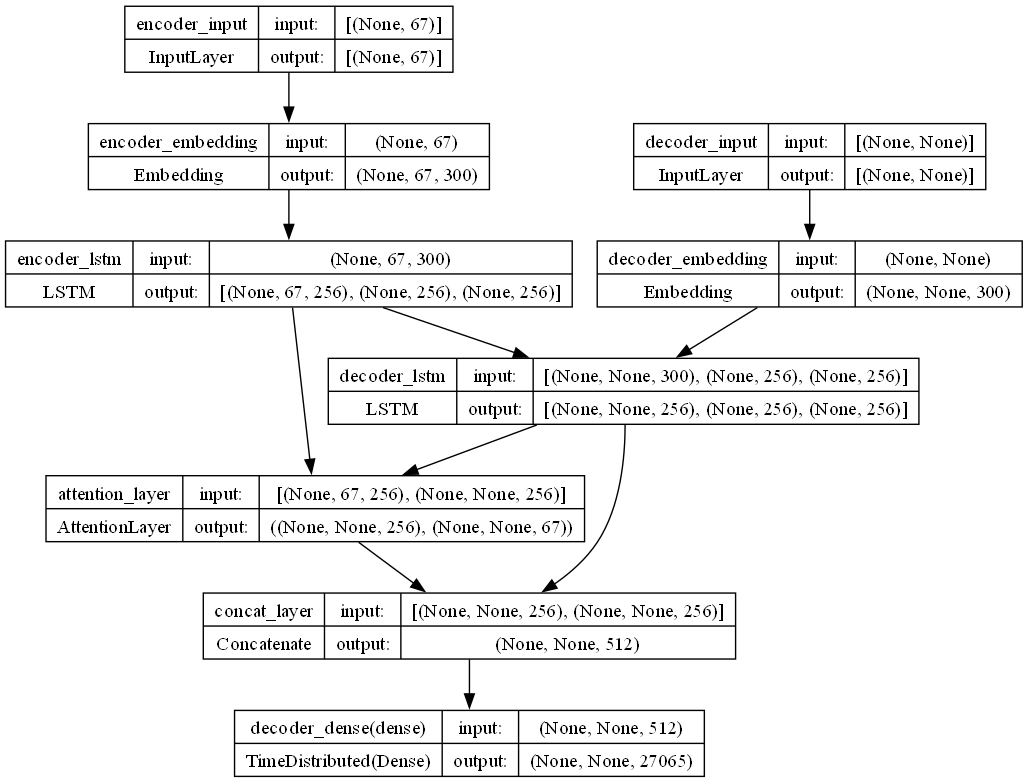

In [34]:
plot_model(LSTMAtt,'LSTMAtt.png', show_shapes=True, show_layer_names=True, dpi=100)

## LSTMAtt Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\LSTMAtt\LSTMAtt_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 5
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=2)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Create model instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
LSTMAtt.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train model
start_time = time.time()

historyLSTMAtt = LSTMAtt.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/5


1374/1374 [==============================] - ETA: 0s - loss: 4.3573 - accuracy: 0.4550
Epoch 1: val_loss improved from inf to 3.49574, saving model to checkpoints\LSTMAtt\LSTMAtt_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 2241s 2s/step - loss: 4.3573 - accuracy: 0.4550 - val_loss: 3.4957 - val_accuracy: 0.5020 - lr: 0.0010
Epoch 2/5
1374/1374 [==============================] - ETA: 0s - loss: 3.2745 - accuracy: 0.5111
Epoch 2: val_loss improved from 3.49574 to 2.98953, saving model to checkpoints\LSTMAtt\LSTMAtt_02.h5
1374/1374 [==============================] - 1543s 1s/step - loss: 3.2745 - accuracy: 0.5111 - val_loss: 2.9895 - val_accuracy: 0.5406 - lr: 0.0010
Epoch 3/5
1374/1374 [==============================] - ETA: 0s - loss: 2.6212 - accuracy: 0.5541
Epoch 3: val_loss improved from 2.98953 to 2.77945, saving model to checkpoints\LSTMAtt\LSTMAtt_03.h5
1374/1374 [==============================] - 1535s 1s/step - loss: 2.6212 - accuracy: 0.5541 - val_loss: 2.7795 - val_accuracy: 0.5597 - lr: 0.0010
Epoch 4/5
1374/1374 [==============================] - ETA: 0s - loss: 2.1432 - accuracy: 0.5951
Epoch 4: val_loss improved from 2.77945 to 2.69193, saving mo

## LSTMAtt Model Performance

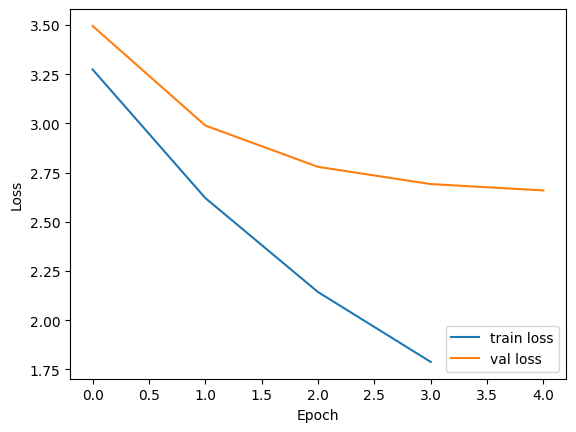

In [ ]:
# Loss
plt.plot(historyLSTMAtt.history['loss'][1:], label='train loss')
plt.plot(historyLSTMAtt.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

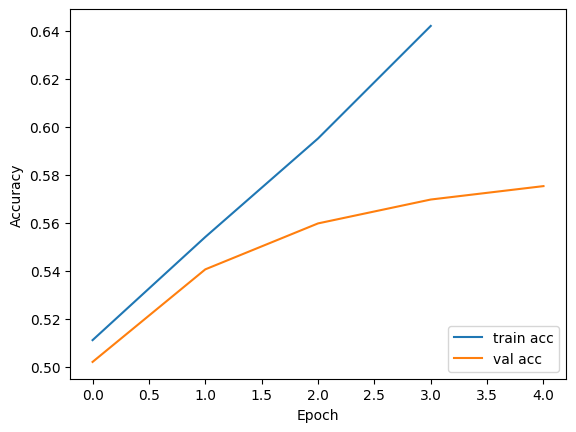

In [ ]:
# Accuracy
plt.plot(historyLSTMAtt.history['accuracy'][1:], label='train acc')
plt.plot(historyLSTMAtt.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## LSTMAtt Inference

In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, outputs=[
                      encoder_output, state_h, state_c])

# Decoder Inference
# Below hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, state_h2, state_c2 = d_lstm(
    d_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input,
                        decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 67, 300)           20577300  
 ng)                                                             
                                                                 
 encoder_lstm (LSTM)         [(None, 67, 256),         570368    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 21147668 (80.67 MB)
Trainable params: 570368 (2.18 MB)
Non-trainable params: 20577300 (78.50 MB)
_________________________________________________________________


In [ ]:
decoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256)]                0         []                      

In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

actual = []
predicted = []

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(0, 10987)
random_sample = random.sample(test_range, 10)
print(random_sample)

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    actualS = actualS.replace('start', '')
    actualS = actualS.replace('end', '')
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

[6272, 9548, 2991, 3576, 2741, 3180, 2775, 1503, 2478, 4642]
1/1 [==============================] - 1s 534ms/step


1/1 [==============================] - 0s 47ms/step


,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,bsf foils 2 hizbul commander killed in j k
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man arrested for criticising fb post fb post
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,kabaddi player arrested for mumbai s death
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder adds women s most number of women
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair up raises 500k,google starts redirecting 200 million in funding
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland prez calls for first time to form political party
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,u khand team india s hockey team of his side
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh s biopic released
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli will win sachin’s if kohli kohli for th

## LSTMAtt Evaluation

In [ ]:
# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
LSTMAttScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
LSTMAttScoreTable = PrettyTable()
LSTMAttScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in LSTMAttScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    LSTMAttScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(LSTMAttScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     31.86     |   30.30    | 30.61  |
| ROUGE-2 |     12.53     |   12.19    | 12.25  |
| ROUGE-L |     25.10     |   23.41    | 23.91  |
+---------+---------------+------------+--------+


# EXPERIMENT 2: GRUAtt

## GRUAtt Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

## Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

## One GRU layer in the encoder
e_gru = GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_gru')
encoder_output, *encoder_final_states  = e_gru(e_emb)


# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

## Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
                  trainable=True,
                  name='decoder_embedding')
d_emb = d_emb_layer(d_input)

## One GRU layer in the decoder
d_gru = GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='decoder_gru')
decoder_output, *decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states)


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
## Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)


## GRUAtt Model Creation

In [ ]:
K.clear_session()

# Intialize the model
GRUAtt = Model([e_input, d_input], decoder_output, name='GRUAtt')
GRUAtt.summary()

Model: "GRUAtt"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 67)]         0           []                               
                                                                                                  
 decoder_input (InputLayer)     [(None, None)]       0           []                               
                                                                                                  
 encoder_embedding (Embedding)  (None, 67, 300)      20577300    ['encoder_input[0][0]']          
                                                                                                  
 decoder_embedding (Embedding)  (None, None, 300)    8119500     ['decoder_input[0][0]']          
                                                                                             

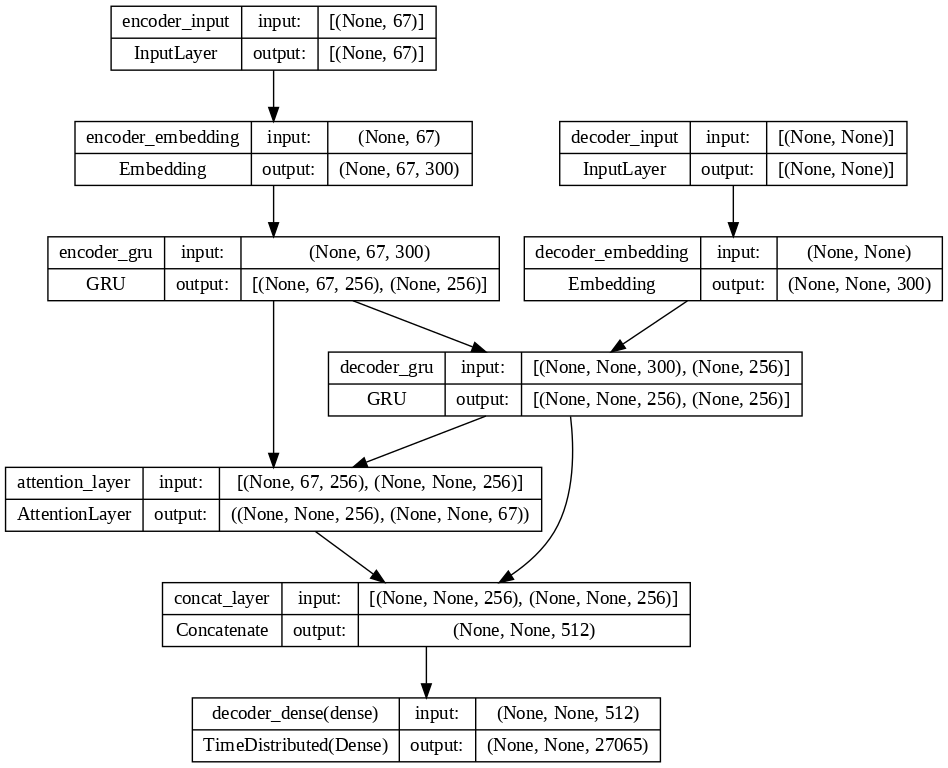

In [ ]:
plot_model(GRUAtt,'GRUAtt.png', show_shapes=True, show_layer_names=True, dpi=100)

## GRUAtt Model Training

In [ ]:
checkpoint_path = r"checkpoints\GRUAtt\GRUAtt_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 5
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=2)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)
callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Create model instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
GRUAtt.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train model
start_time = time.time()

historyGRUAtt = GRUAtt.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/5
1374/1374 [==============================] - ETA: 0s - loss: 4.2226 - accuracy: 0.4645
Epoch 1: val_loss improved from inf to 3.30927, saving model to /content/drive/MyDrive/ATS/checkpoints/GRUAtt/GRUAtt_01.h5
1374/1374 [==============================] - 4978s 4s/step - loss: 4.2226 - accuracy: 0.4645 - val_loss: 3.3093 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 2/5
1374/1374 [==============================] - ETA: 0s - loss: 3.0675 - accuracy: 0.5274
Epoch 2: val_loss improved from 3.30927 to 2.88073, saving model to /content/drive/MyDrive/ATS/checkpoints/GRUAtt/GRUAtt_02.h5
1374/1374 [==============================] - 4729s 3s/step - loss: 3.0675 - accuracy: 0.5274 - val_loss: 2.8807 - val_accuracy: 0.5538 - lr: 0.0010
Epoch 3/5
1374/1374 [==============================] - ETA: 0s - loss: 2.4227 - accuracy: 0.5720
Epoch 3: val_loss improved from 2.88073 to 2.71594, saving model to /content/drive/MyDrive/ATS/checkpoints/GRUAtt/GRUAtt_03.h5
1374/1374 [=========================

## GRUAtt Model Performance

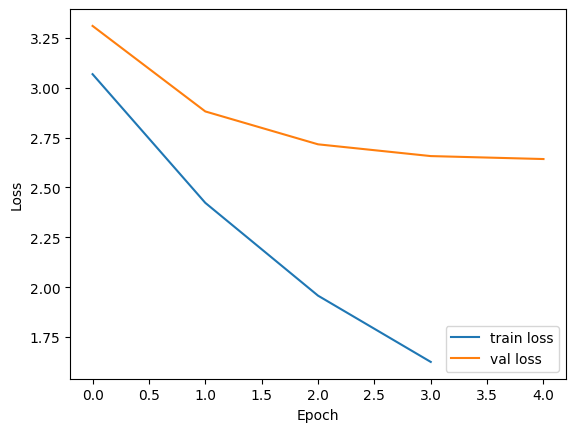

In [ ]:
# Loss
plt.plot(historyGRUAtt.history['loss'][1:], label='train loss')
plt.plot(historyGRUAtt.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

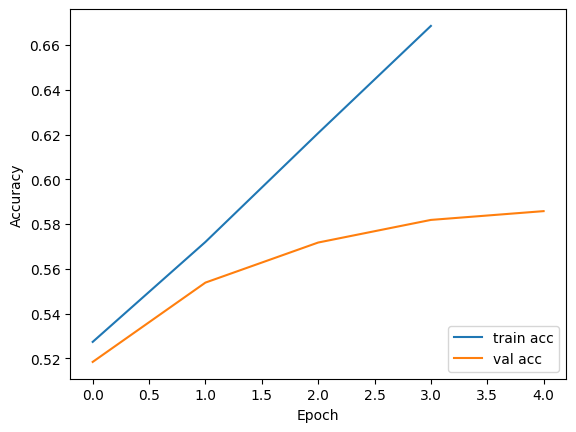

In [ ]:
# Accuracy
plt.plot(historyGRUAtt.history['accuracy'][1:], label='train acc')
plt.plot(historyGRUAtt.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## GRUAtt Inference

In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input,
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(d_emb2, initial_state=decoder_state_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input, decoder_state_input_h],
    [decoder_outputs2] + decoder_states)

In [ ]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddin  (None, 67, 300)          20577300  
 g)                                                              
                                                                 
 encoder_gru (GRU)           [(None, 67, 256),         428544    
                              (None, 256)]                       
                                                                 
Total params: 21,005,844
Trainable params: 428,544
Non-trainable params: 20,577,300
_________________________________________________________________


In [ ]:
decoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 decoder_input (InputLayer)     [(None, None)]       0           []                               
                                                                                                  
 decoder_embedding (Embedding)  (None, None, 300)    8119500     ['decoder_input[0][0]']          
                                                                                                  
 input_1 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 decoder_gru (GRU)              [(None, None, 256),  428544      ['decoder_embedding[1][0]',      
                                 (None, 256)]                     'input_1[0][0]']          

In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, e_h = encoder_model.predict(input_seq)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h = decoder_model.predict([target_seq] + [e_out, e_h])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h = h

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

actual = []
predicted = []

# print(range(len(y_test)))
random.seed(24)
test_range = range(0, 10987)
random_sample = random.sample(test_range, 10)
print(random_sample)

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    actualS = actualS.replace('start', '')
    actualS = actualS.replace('end', '')
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

[6272, 9548, 2991, 3576, 2741, 3180, 2775, 1503, 2478, 4642]
1/1 [==============================] - 0s 35ms/step


,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,two militants killed in j k encounter
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man fakes trending on twitter today
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,kabaddi player arrested in scuffle with wife
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder most trending on twitter
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair up raises 500k,mobile repair smartphone with 300 million
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland invites anti anti nationals
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,bhagat singh’s head of the indian team of the year
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born released
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli will come together as captain of india s 631
9,the first two way long distance phone ca

## GRUAtt Evaluation

In [ ]:
# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
GRUAttScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
GRUAttScoreTable = PrettyTable()
GRUAttScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in GRUAttScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    GRUAttScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(GRUAttScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     30.60     |   24.46    | 26.77  |
| ROUGE-2 |     14.67     |   11.05    | 12.48  |
| ROUGE-L |     28.93     |   22.46    | 24.95  |
+---------+---------------+------------+--------+


# EXPERIMENT 3: BiLSTMAtt

## BiLSTMAtt Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-LSTM ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-LSTM layer in the encoder
e_bilstm = Bidirectional(
    LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_lstm'),
    name='encoder_bilstm')
encoder_output, *encoder_final_states = e_bilstm(e_emb)
# encoder_output = [
#             encoder_output, forward_h, forward_c, backward_h, backward_c]


# BI-LSTM DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One Bi-LSTM layer in the decoder
d_bilstm = Bidirectional(
    LSTM(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.3,
    recurrent_dropout=0.2,
    name='decoder_lstm'),
    name='decoder_bilstm')
# Final output states of encoder last layer are fed into decoder
decoder_output, *decoder_final_states = d_bilstm(
    d_emb, initial_state=encoder_final_states)


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder Bi-LSTM output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

## BiLSTMAtt Model Creation

In [ ]:
K.clear_session()

# Intialize the model
BiLSTMAtt = Model([e_input, d_input], decoder_output, name='BiLSTMAtt')
BiLSTMAtt.summary()

Model: "BiLSTMAtt"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 67)]                 0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 67, 300)              2057730   ['encoder_input[0][0]']       
 ng)                                                      0                                       
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]'

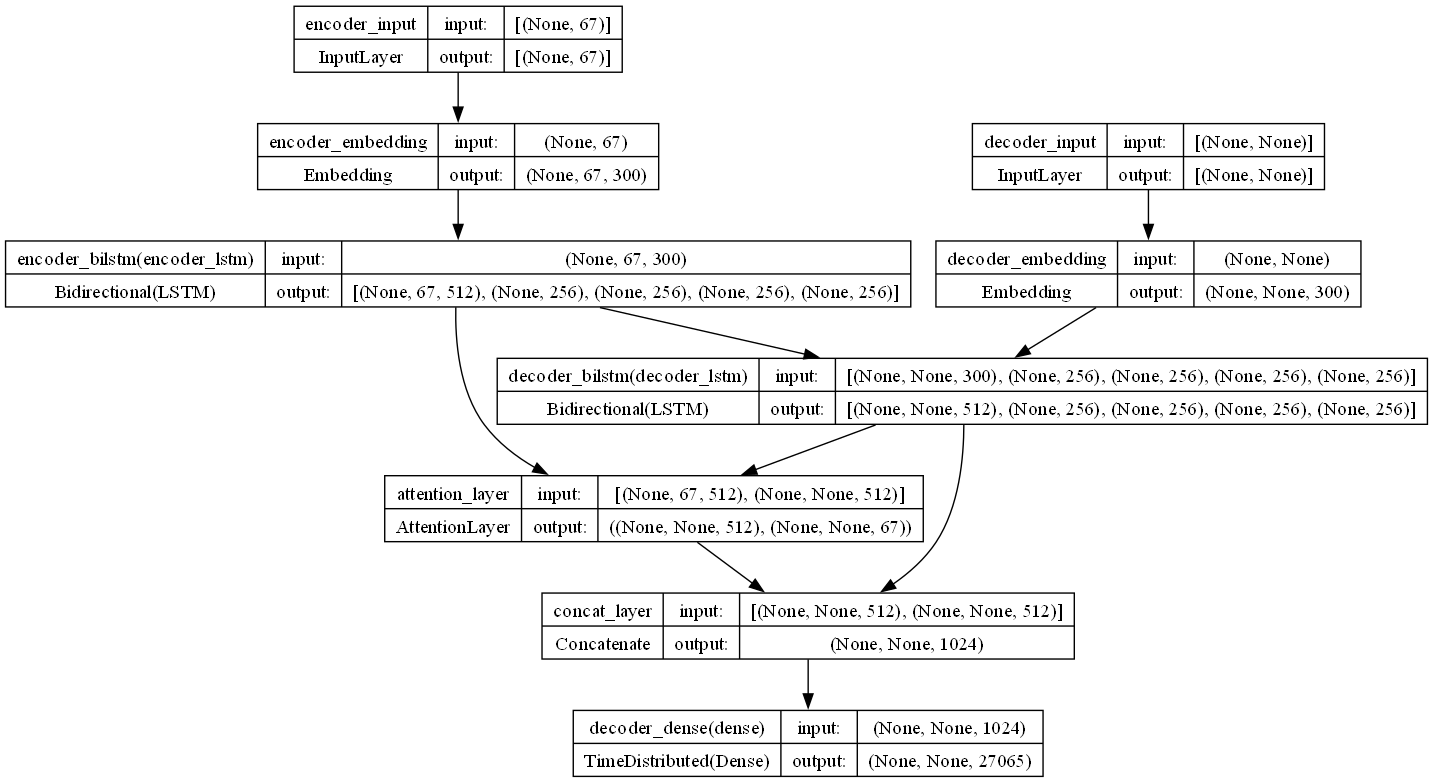

In [ ]:
plot_model(BiLSTMAtt,'BiLSTMAtt.png', show_shapes=True, show_layer_names=True, dpi=100)

## BiLSTMAtt Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\BiLSTMAtt\BiLSTMAtt_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 5
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=2)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Create model instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
BiLSTMAtt.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train model
start_time = time.time()

historyBiLSTMAtt = BiLSTMAtt.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/5


1374/1374 [==============================] - ETA: 0s - loss: 2.5712 - accuracy: 0.6756
Epoch 1: val_loss improved from inf to 0.98806, saving model to checkpoints\BiLSTMAtt\BiLSTMAtt_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 2929s 2s/step - loss: 2.5712 - accuracy: 0.6756 - val_loss: 0.9881 - val_accuracy: 0.8668 - lr: 0.0010
Epoch 2/5
1374/1374 [==============================] - ETA: 0s - loss: 0.7874 - accuracy: 0.8940
Epoch 2: val_loss improved from 0.98806 to 0.43050, saving model to checkpoints\BiLSTMAtt\BiLSTMAtt_02.h5
1374/1374 [==============================] - 2790s 2s/step - loss: 0.7874 - accuracy: 0.8940 - val_loss: 0.4305 - val_accuracy: 0.9413 - lr: 0.0010
Epoch 3/5
1374/1374 [==============================] - ETA: 0s - loss: 0.2362 - accuracy: 0.9668
Epoch 3: val_loss improved from 0.43050 to 0.30665, saving model to checkpoints\BiLSTMAtt\BiLSTMAtt_03.h5
1374/1374 [==============================] - 2890s 2s/step - loss: 0.2362 - accuracy: 0.9668 - val_loss: 0.3067 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 4/5
1374/1374 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9960
Epoch 4: val_loss improved from 0.30665 to 0.28458, s

## BiLSTMAtt Model Performance

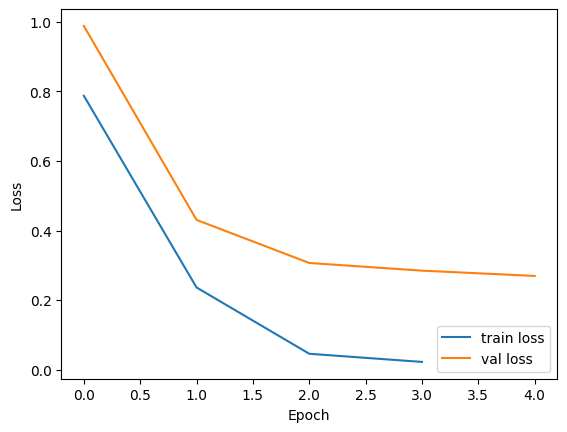

In [ ]:
# Loss
plt.plot(historyBiLSTMAtt.history['loss'][1:], label='train loss')
plt.plot(historyBiLSTMAtt.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

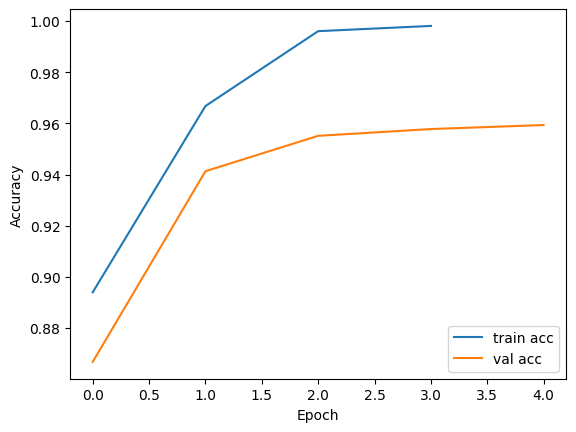

In [ ]:
# Accuracy
plt.plot(historyBiLSTMAtt.history['accuracy'][1:], label='train acc')
plt.plot(historyBiLSTMAtt.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## BiLSTMAtt Inference

In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below hold the states of the previous time step
decoder_state_forward_input_h = Input(shape=(latent_dim, ))
decoder_state_forward_input_c = Input(shape=(latent_dim, ))
decoder_state_backward_input_h = Input(shape=(latent_dim, ))
decoder_state_backward_input_c = Input(shape=(latent_dim, ))

# Create the hidden input layer with twice the latent dimension,
# since we are using bi - directional LSTM's we will get 
# two hidden states and two cell states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

decoder_initial_state = [
        decoder_state_forward_input_h, decoder_state_forward_input_c,
        decoder_state_backward_input_h, decoder_state_backward_input_c
    ]

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_bilstm(
    d_emb2, initial_state=decoder_initial_state)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + decoder_initial_state,
    [decoder_outputs2] + decoder_states)

In [ ]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 67, 300)           20577300  
 ng)                                                             
                                                                 
 encoder_bilstm (Bidirectio  [(None, 67, 512),         1140736   
 nal)                         (None, 256),                       
                              (None, 256),                       
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 21718036 (82.85 MB)
Trainable params: 1140736 (4.35 MB)
Non-trainable params: 20577300 (78.50 MB)
_______________

In [ ]:
decoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256)]                0         []                      

In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) # Greedy search
        sampled_token = reverse_target_word_index[sampled_token_index + 1]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states
        
    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

actual = []
predicted = []

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(0, 10987)
random_sample = random.sample(test_range, 10)
print(random_sample)

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    actualS = actualS.replace('start', '')
    actualS = actualS.replace('end', '')
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

[6272, 9548, 2991, 3576, 2741, 3180, 2775, 1503, 2478, 4642]


1/1 [==============================] - 0s 63ms/step


,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,to sostok to sostok lashkar lashkar lashkar lashkar lashkar lashkar lashkar lashkar lashkar lashkar lashkar
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,to to to schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,to sostok to sostok schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,to sostok to sostok schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair up raises 500k,to sostok to sostok schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,to sostok to sostok cancel cancel cancel cancel cancel cancel cancel cancel cancel cancel cancel
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,to sostok to sostok schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes schemes
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,to sostok to sostok sostok sostok sostok sostok sostok sost

## BiLSTMAtt Evaluation

In [ ]:
# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
BiLSTMAttScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
BiLSTMAttScoreTable = PrettyTable()
BiLSTMAttScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in BiLSTMAttScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    BiLSTMAttScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(BiLSTMAttScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |      8.33     |    2.68    |  4.00  |
| ROUGE-2 |      0.00     |    0.00    |  0.00  |
| ROUGE-L |      8.33     |    2.68    |  4.00  |
+---------+---------------+------------+--------+


# EXPERIMENT 4: BiGRUAtt

## BiGRUAtt Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-GRU layer in the encoder
e_bigru = Bidirectional(
    GRU(latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_gru'),
    name='encoder_bigru')
encoder_output, *encoder_final_states = e_bigru(e_emb)


# BI-GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One Bi-GRU layer in the decoder
d_bigru = Bidirectional(
    GRU(latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='decoder_gru'),
    name='decoder_bigru')
# Final output states of encoder last layer are fed into decoder
decoder_output, *decoder_final_states = d_bigru(
    d_emb, initial_state=encoder_final_states)


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder Bi-GRU output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

## BiGRUAtt Model Creation

In [ ]:
K.clear_session()

# Intialize the model
BiGRUAtt = Model([e_input, d_input], decoder_output, name='BiGRUAtt')
BiGRUAtt.summary()

Model: "BiGRUAtt"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 67)]                 0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 67, 300)              2057730   ['encoder_input[0][0]']       
 ng)                                                      0                                       
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']

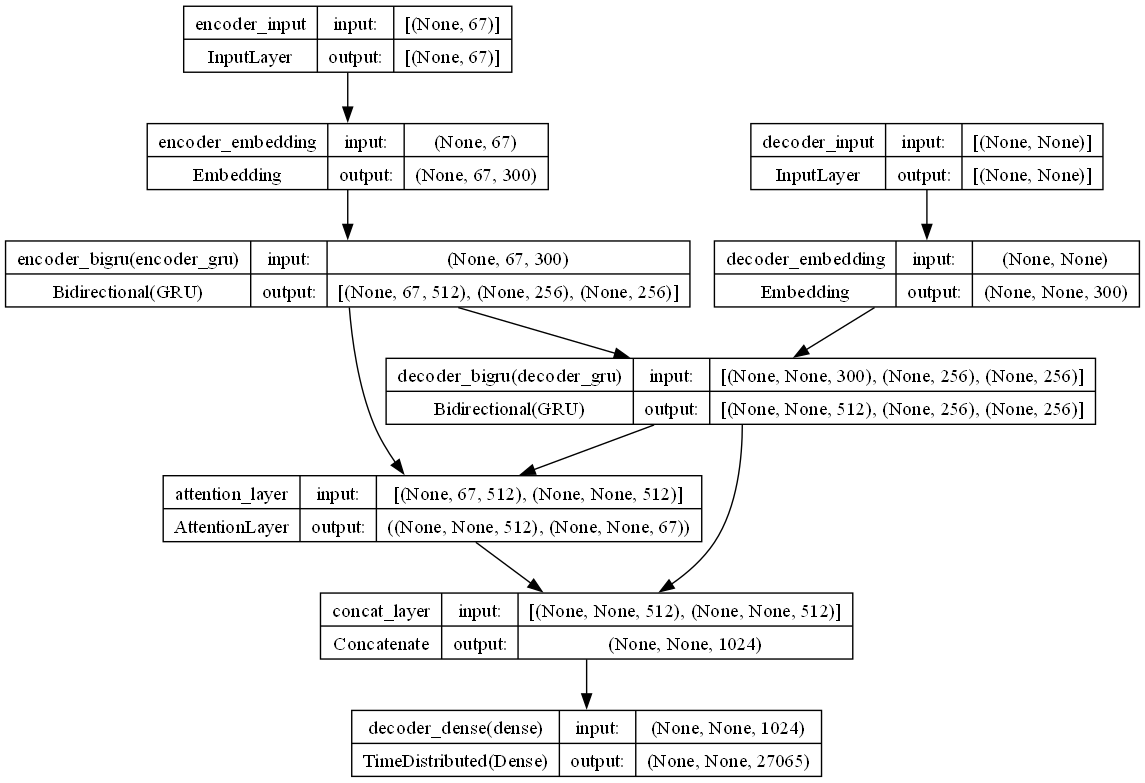

In [ ]:
plot_model(BiGRUAtt,'BiGRUAtt.png', show_shapes=True, show_layer_names=True, dpi=100)

## BiGRUAtt Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\BiGRUAtt\BiGRUAtt_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 5
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=2)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Create model instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
BiGRUAtt.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train model
start_time = time.time()

historyBiGRUAtt = BiGRUAtt.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/5


1374/1374 [==============================] - ETA: 0s - loss: 2.2653 - accuracy: 0.7189
Epoch 1: val_loss improved from inf to 0.63980, saving model to checkpoints\BiGRUAtt\BiGRUAtt_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 3012s 2s/step - loss: 2.2653 - accuracy: 0.7189 - val_loss: 0.6398 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 2/5
1374/1374 [==============================] - ETA: 0s - loss: 0.4684 - accuracy: 0.9347
Epoch 2: val_loss improved from 0.63980 to 0.22294, saving model to checkpoints\BiGRUAtt\BiGRUAtt_02.h5
1374/1374 [==============================] - 2962s 2s/step - loss: 0.4684 - accuracy: 0.9347 - val_loss: 0.2229 - val_accuracy: 0.9653 - lr: 0.0010
Epoch 3/5
1374/1374 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.9868
Epoch 3: val_loss improved from 0.22294 to 0.17424, saving model to checkpoints\BiGRUAtt\BiGRUAtt_03.h5
1374/1374 [==============================] - 2961s 2s/step - loss: 0.0877 - accuracy: 0.9868 - val_loss: 0.1742 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 4/5
1374/1374 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9967
Epoch 4: val_loss improved from 0.17424 to 0.15702, savin

## BiGRUAtt Model Performance

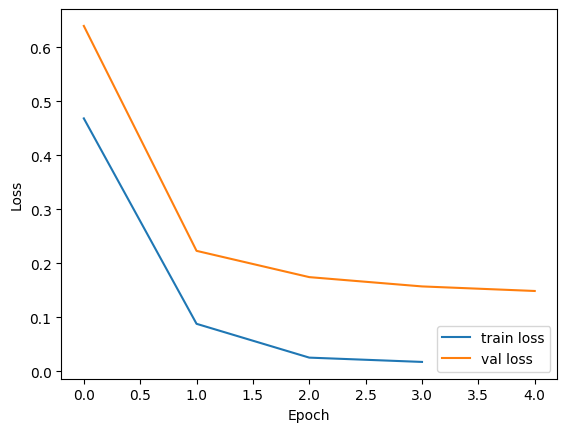

In [ ]:
# Loss
plt.plot(historyBiGRUAtt.history['loss'][1:], label='train loss')
plt.plot(historyBiGRUAtt.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

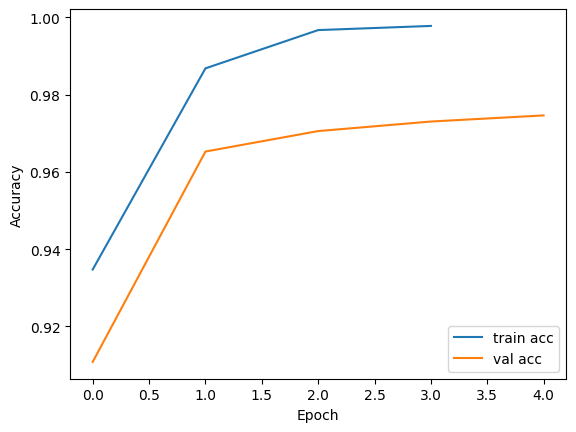

In [ ]:
# Accuracy
plt.plot(historyBiGRUAtt.history['accuracy'][1:], label='train acc')
plt.plot(historyBiGRUAtt.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## BiGRUAtt Inference

In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below hold the states of the previous time step
decoder_state_forward_input_h = Input(shape=(latent_dim, ))
decoder_state_backward_input_h = Input(shape=(latent_dim, ))

# Create the hidden input layer with twice the latent dimension,
# since we are using bi - directional GRU's we will get two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

decoder_initial_state = [
        decoder_state_forward_input_h, 
        decoder_state_backward_input_h
    ]

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_bigru(
    d_emb2, initial_state=decoder_initial_state)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + decoder_initial_state,
    [decoder_outputs2] + decoder_states)

In [ ]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 67, 300)           20577300  
 ng)                                                             
                                                                 
 encoder_bigru (Bidirection  [(None, 67, 512),         857088    
 al)                          (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 21434388 (81.77 MB)
Trainable params: 857088 (3.27 MB)
Non-trainable params: 20577300 (78.50 MB)
_________________________________________________________________


In [ ]:
decoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256)]                0         []                      

In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) # Greedy search
        sampled_token = reverse_target_word_index[sampled_token_index + 1]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states
        
    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

actual = []
predicted = []

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(0, 10987)
random_sample = random.sample(test_range, 10)
print(random_sample)

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    actualS = actualS.replace('start', '')
    actualS = actualS.replace('end', '')
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

[6272, 9548, 2991, 3576, 2741, 3180, 2775, 1503, 2478, 4642]


1/1 [==============================] - 0s 50ms/step


,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,formula war formula war formula war formula war formula war formula war formula war formula
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,ousted qualifier ousted qualifier ousted qualifier ousted qualifier ousted qualifier ousted qualifier ousted qualifier ousted
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,to sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,bn soodhu bn soodhu bn soodhu bn soodhu bn soodhu bn soodhu bn soodhu bn
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair up raises 500k,durga durga durga durga durga durga durga durga durga durga durga durga durga durga durga
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,strategy jd strategy jd strategy jd strategy jd strategy jd strategy jd strategy jd strategy
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,fankaara glorify ramiz 746 ₹80 rathore ₹80 rathore profile nauru profile nauru profile nauru profile
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,got thursday got thursday got thursday got thursday got thursday got thursday got thursday got
8,in his first conference afte

## BiGRUAtt Evaluation

In [ ]:
# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
BiGRUAttScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
BiGRUAttScoreTable = PrettyTable()
BiGRUAttScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in BiGRUAttScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    BiGRUAttScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(BiGRUAttScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |      0.00     |    0.00    |  0.00  |
| ROUGE-2 |      0.00     |    0.00    |  0.00  |
| ROUGE-L |      0.00     |    0.00    |  0.00  |
+---------+---------------+------------+--------+


# EXPERIMENT 5: HyLSTMAtt

## HyLSTMAtt Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-LSTM ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

## Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

## One Bi-LSTM layer in the encoder
e_bilstm = Bidirectional(
    LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_lstm'),
    name='encoder_bilstm')
encoder_output, *encoder_final_states = e_bilstm(e_emb)


# LSTM DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

## Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
                  trainable=True,
                  name='decoder_embedding')
d_emb = d_emb_layer(d_input)

## One LSTM layer in the decoder
d_lstm = LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='decoder_lstm')
decoder_output, *decoder_final_states = d_lstm(d_emb, initial_state=encoder_final_states[:2]) 
# taking only the forward states


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
## Concatenating attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)


## HyLSTMAtt Model Creation

In [ ]:
K.clear_session()

# Intialize the model
HyLSTMAtt = Model([e_input, d_input], decoder_output, name='HyLSTMAtt')
HyLSTMAtt.summary()

Model: "HyLSTMAtt"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 67)]                 0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 67, 300)              2057730   ['encoder_input[0][0]']       
 ng)                                                      0                                       
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]'

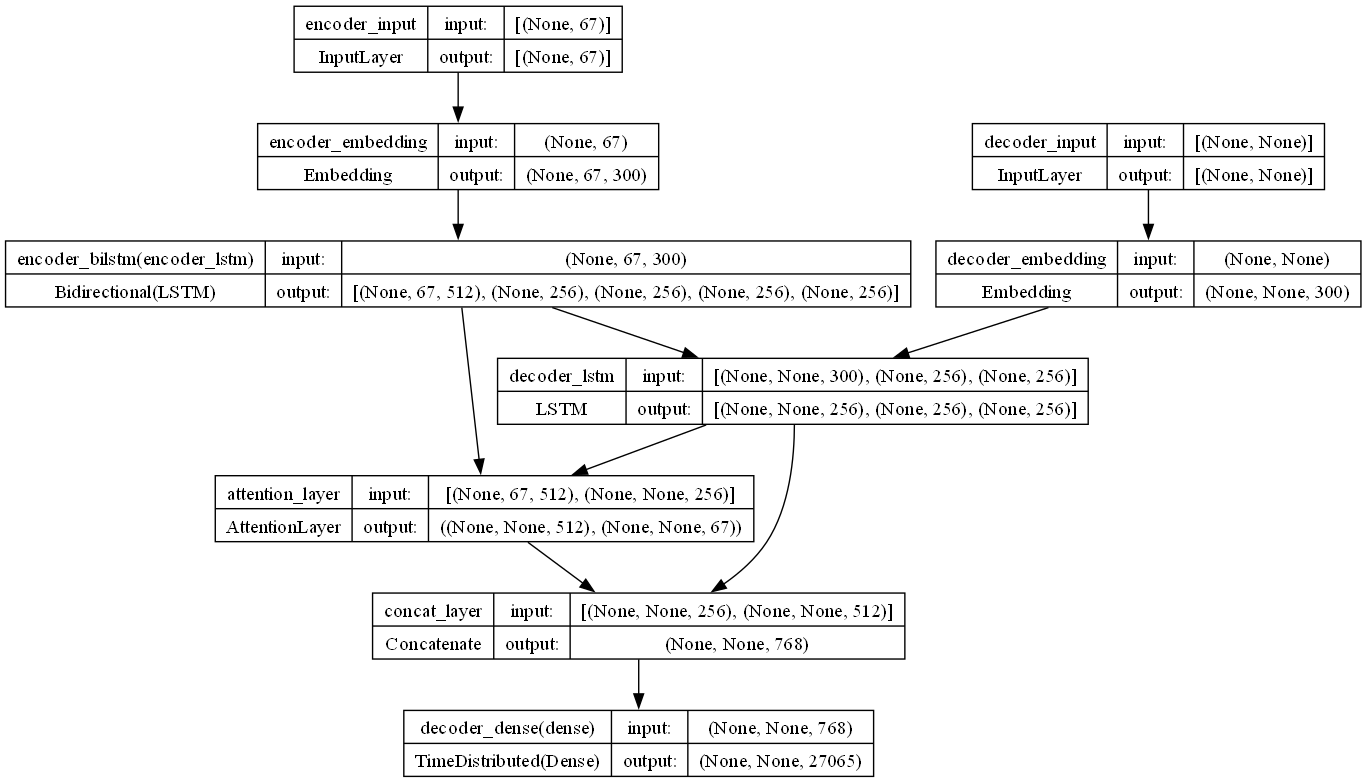

In [ ]:
plot_model(HyLSTMAtt,'HyLSTMAtt.png', show_shapes=True, show_layer_names=True, dpi=100)

## HyLSTMAtt Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyLSTMAtt\HyLSTMAtt_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 5
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=2)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Create model instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyLSTMAtt.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train model
start_time = time.time()

historyHyLSTMAtt = HyLSTMAtt.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/5


1374/1374 [==============================] - ETA: 0s - loss: 4.2955 - accuracy: 0.4591
Epoch 1: val_loss improved from inf to 3.35243, saving model to checkpoints\HyLSTMAtt\HyLSTMAtt_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 3103s 2s/step - loss: 4.2955 - accuracy: 0.4591 - val_loss: 3.3524 - val_accuracy: 0.5154 - lr: 0.0010
Epoch 2/5
1374/1374 [==============================] - ETA: 0s - loss: 3.0584 - accuracy: 0.5330
Epoch 2: val_loss improved from 3.35243 to 2.75677, saving model to checkpoints\HyLSTMAtt\HyLSTMAtt_02.h5
1374/1374 [==============================] - 2876s 2s/step - loss: 3.0584 - accuracy: 0.5330 - val_loss: 2.7568 - val_accuracy: 0.5669 - lr: 0.0010
Epoch 3/5
1374/1374 [==============================] - ETA: 0s - loss: 2.2934 - accuracy: 0.5912
Epoch 3: val_loss improved from 2.75677 to 2.51931, saving model to checkpoints\HyLSTMAtt\HyLSTMAtt_03.h5
1374/1374 [==============================] - 2977s 2s/step - loss: 2.2934 - accuracy: 0.5912 - val_loss: 2.5193 - val_accuracy: 0.5912 - lr: 0.0010
Epoch 4/5
1374/1374 [==============================] - ETA: 0s - loss: 1.7531 - accuracy: 0.6511
Epoch 4: val_loss improved from 2.51931 to 2.45165, s

## HyLSTMAtt Model Performance

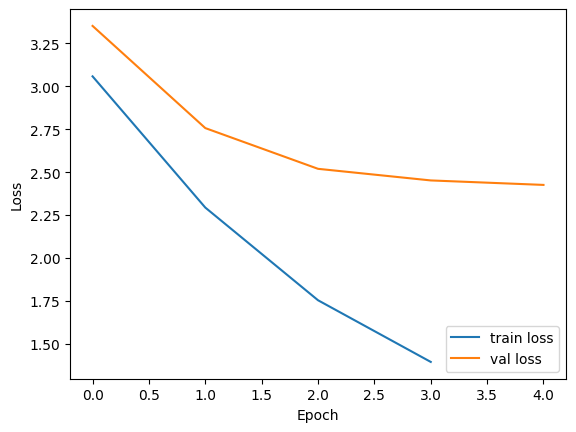

In [ ]:
# Loss
plt.plot(historyHyLSTMAtt.history['loss'][1:], label='train loss')
plt.plot(historyHyLSTMAtt.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

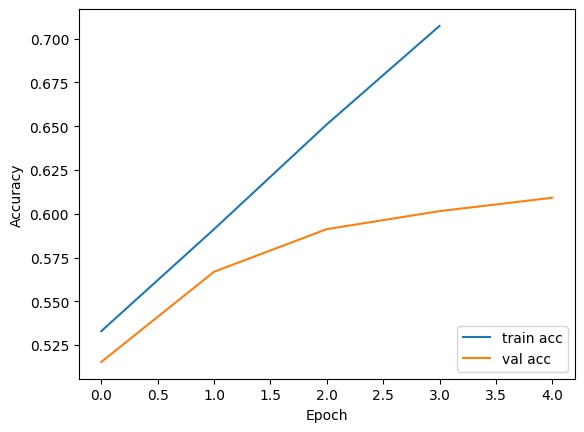

In [ ]:
# Accuracy
plt.plot(historyHyLSTMAtt.history['accuracy'][1:], label='train acc')
plt.plot(historyHyLSTMAtt.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyLSTMAtt Inference

In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))
decoder_state_fwd_input_c = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Since we are using bi - directional LSTM's 
# There will be two hidden states and two cell states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

decoder_initial_state = [decoder_state_fwd_input_h,
                         decoder_state_fwd_input_c]

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_lstm(
    d_emb2, initial_state=decoder_initial_state)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + decoder_initial_state,
    [decoder_outputs2] + decoder_states)


In [ ]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 67, 300)           20577300  
 ng)                                                             
                                                                 
 encoder_bilstm (Bidirectio  [(None, 67, 512),         1140736   
 nal)                         (None, 256),                       
                              (None, 256),                       
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 21718036 (82.85 MB)
Trainable params: 1140736 (4.35 MB)
Non-trainable params: 20577300 (78.50 MB)
_______________

In [ ]:
decoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256)]                0         []                      

In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:2])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

actual = []
predicted = []

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(0, 10987)
random_sample = random.sample(test_range, 10)
print(random_sample)

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    actualS = actualS.replace('start', '')
    actualS = actualS.replace('end', '')
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

[6272, 9548, 2991, 3576, 2741, 3180, 2775, 1503, 2478, 4642]


1/1 [==============================] - 0s 47ms/step


,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,two bsf jawans martyred in bsf operation fire
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man arrested for posting obscene comments on twitter
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,kabaddi player arrested after being held in mumbai
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder adds most valuable list of men women
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair up raises 500k,paytm raises 500k in its third round of funding
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland s president joins anti democratic party
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,indian cricket team s u 17 injured in mumbai
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born sets up
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli will win more than kohli in the f

## HyLSTMAtt Evaluation

In [ ]:
# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyLSTMAttScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyLSTMAttScoreTable = PrettyTable()
HyLSTMAttScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyLSTMAttScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyLSTMAttScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyLSTMAttScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     33.55     |   32.00    | 32.19  |
| ROUGE-2 |     12.77     |   13.46    | 12.82  |
| ROUGE-L |     30.87     |   29.32    | 29.51  |
+---------+---------------+------------+--------+


# EXPERIMENT 6: HyGRUAtt

## HyGRUAtt Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [2]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [3]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [4]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-GRU layer in the encoder
e_bigru = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_gru'),
    name='encoder_bigru')
encoder_output, *encoder_final_states = e_bigru(e_emb)


# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One GRU layer in the decoder
d_gru = GRU(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.3,
    recurrent_dropout=0.2,
    name='decoder_gru')
decoder_output, * \
    decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states[:1])


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

## HyGRUAtt Model Creation

In [ ]:
K.clear_session()

# Intialize the model
HyGRUAtt = Model([e_input, d_input], decoder_output, name='HyGRUAtt')
HyGRUAtt.summary()

Model: "HyGRUAtt"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 67)]                 0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 67, 300)              2057730   ['encoder_input[0][0]']       
 ng)                                                      0                                       
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']

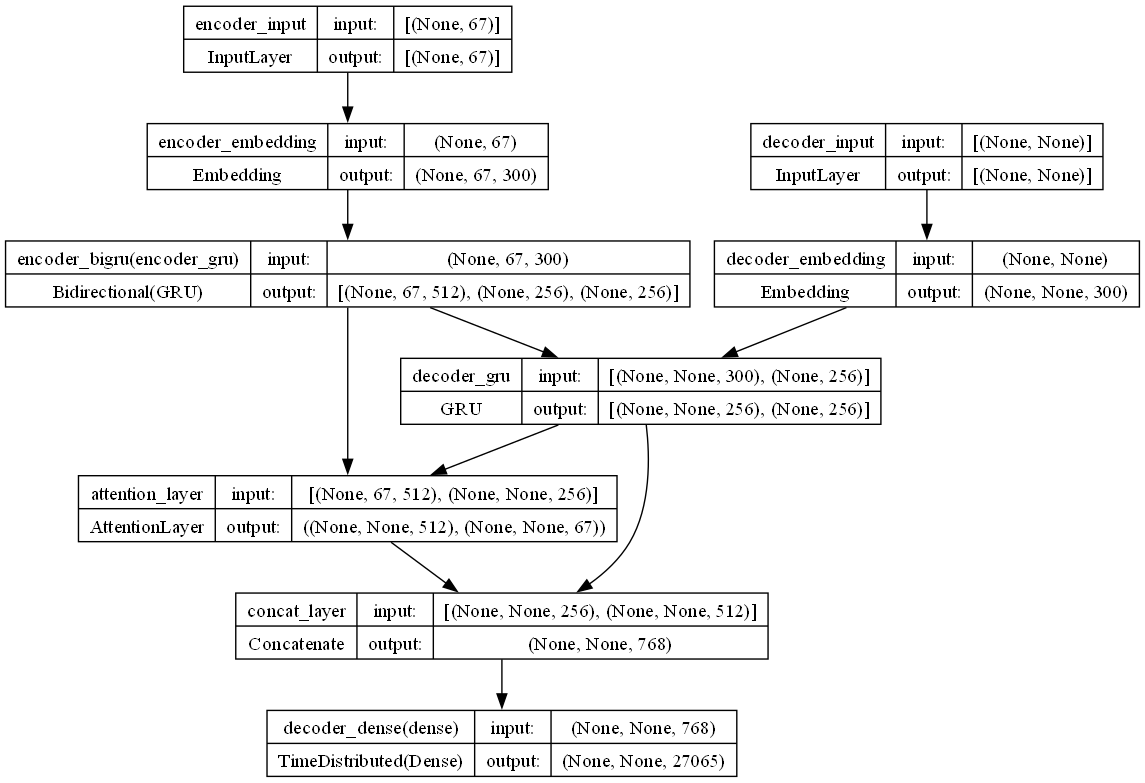

In [ ]:
plot_model(HyGRUAtt,'HyGRUAtt.png', show_shapes=True, show_layer_names=True, dpi=100)

## HyGRUAtt Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyGRUAtt\HyGRUAtt_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 5
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration 
# is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=2)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Create model instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyGRUAtt.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train model
start_time = time.time()

historyHyGRUAtt = HyGRUAtt.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/5


1374/1374 [==============================] - ETA: 0s - loss: 4.0308 - accuracy: 0.4796
Epoch 1: val_loss improved from inf to 2.94795, saving model to checkpoints\HyGRUAtt\HyGRUAtt_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 2754s 2s/step - loss: 4.0308 - accuracy: 0.4796 - val_loss: 2.9480 - val_accuracy: 0.5555 - lr: 0.0010
Epoch 2/5
1374/1374 [==============================] - ETA: 0s - loss: 2.6251 - accuracy: 0.5803
Epoch 2: val_loss improved from 2.94795 to 2.39488, saving model to checkpoints\HyGRUAtt\HyGRUAtt_02.h5
1374/1374 [==============================] - 2108s 2s/step - loss: 2.6251 - accuracy: 0.5803 - val_loss: 2.3949 - val_accuracy: 0.6166 - lr: 0.0010
Epoch 3/5
1374/1374 [==============================] - ETA: 0s - loss: 1.9032 - accuracy: 0.6463
Epoch 3: val_loss improved from 2.39488 to 2.27858, saving model to checkpoints\HyGRUAtt\HyGRUAtt_03.h5
1374/1374 [==============================] - 1891s 1s/step - loss: 1.9032 - accuracy: 0.6463 - val_loss: 2.2786 - val_accuracy: 0.6322 - lr: 0.0010
Epoch 4/5
1374/1374 [==============================] - ETA: 0s - loss: 1.4644 - accuracy: 0.7037
Epoch 4: val_loss improved from 2.27858 to 2.25439, savin

## HyGRUAtt Model Performance

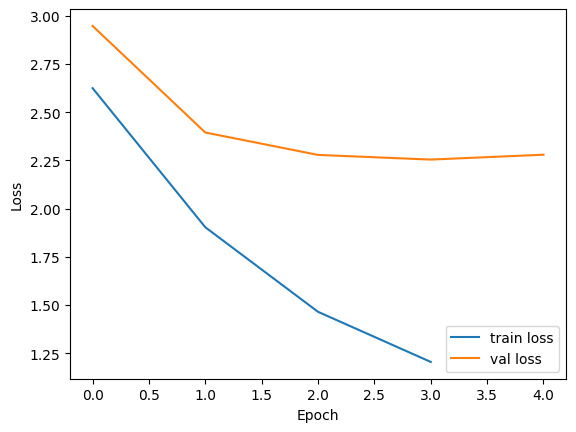

In [ ]:
# Loss
plt.plot(historyHyGRUAtt.history['loss'][1:], label='train loss')
plt.plot(historyHyGRUAtt.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

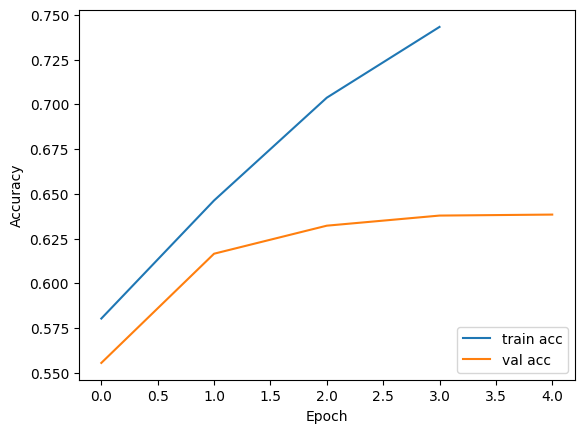

In [ ]:
# Accuracy
plt.plot(historyHyGRUAtt.history['accuracy'][1:], label='train acc')
plt.plot(historyHyGRUAtt.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyGRUAtt Inference

In [5]:
K.clear_session()

# Load the best model
HyGRUAtt = Model([e_input, d_input], decoder_output, name='HyGRUAtt')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyGRUAtt.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAtt.load_weights('checkpoints/HyGRUAtt/HyGRUAtt_04.h5')

In [6]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [7]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Bi - directional GRU has two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(
    d_emb2, initial_state=decoder_state_fwd_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + [decoder_state_fwd_input_h],
    [decoder_outputs2] + decoder_states)


In [8]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 67, 300)           20577300  
 ng)                                                             
                                                                 
 encoder_bigru (Bidirection  [(None, 67, 512),         857088    
 al)                          (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 21434388 (81.77 MB)
Trainable params: 857088 (3.27 MB)
Non-trainable params: 20577300 (78.50 MB)
_________________________________________________________________


In [9]:
decoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 decoder_gru (GRU)           [(None, None, 256),          428544    ['decoder_embedding[1][0

In [8]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq, verbose = 0)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:1], verbose = 0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [9]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [12]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

actual = []
predicted = []

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(0, 10987)
random_sample = random.sample(test_range, 10)
print(random_sample)

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

[6272, 9548, 2991, 3576, 2741, 3180, 2775, 1503, 2478, 4642]
1/1 [==============================] - 0s 34ms/step


,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,3 bsf jawans martyred in j k encounter
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man arrested for posting message on social inequality
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,jnu player arrested for wife s suicide in mumbai
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder partners with women in men and women
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair startup raises 500k,quikr raises 500k via letsventure
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland invites anti party party to form govt
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,india s u 19 team found dead in mumbai room
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born to run out
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli to win more than playing indian team in india
9,th

## HyGRUAtt Evaluation

In [13]:
# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttScoreTable = PrettyTable()
HyGRUAttScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     46.73     |   44.85    | 45.48  |
| ROUGE-2 |     25.02     |   24.05    | 24.33  |
| ROUGE-L |     43.30     |   41.76    | 42.23  |
+---------+---------------+------------+--------+


In [10]:
# Predict the rest of the samples
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)

actual = []
predicted = []

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)

# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttScoreTable = PrettyTable()
HyGRUAttScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     38.82     |   37.17    | 37.42  |
| ROUGE-2 |     15.76     |   15.78    | 15.51  |
| ROUGE-L |     36.57     |   35.00    | 35.24  |
+---------+---------------+------------+--------+


# EXPERIMENT 7: HyGRUAtt3

## HyGRUAtt3 Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [2]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [3]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [4]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

## Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

## First Bi-GRU layer in the encoder
e_bigru1 = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_gru1'),
    name='encoder_bigru1')
encoder_output1, *_ = e_bigru1(e_emb)

## Second Bi-GRU layer in the encoder
e_bigru2 = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_gru2'),
    name='encoder_bigru2')
encoder_output2, *_ = e_bigru2(encoder_output1)

## Third Bi-GRU layer in the encoder
e_bigru3 = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_gru3'),
    name='encoder_bigru3')
encoder_output, *encoder_final_states = e_bigru3(encoder_output2)

# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

## Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
                  trainable=True,
                  name='decoder_embedding')
d_emb = d_emb_layer(d_input)

## One GRU layer in the decoder
d_gru= GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='decoder_gru')
decoder_output, *decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states[:1]) 
# taking only the forward states


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
## Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)


## HyGRUAtt3 Model Creation

In [5]:
K.clear_session()

# Intialize the model
HyGRUAtt3 = Model([e_input, d_input], decoder_output, name='HyGRUAtt3')
HyGRUAtt3.summary()

Model: "HyGRUAtt3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 67)]                 0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 67, 300)              2057730   ['encoder_input[0][0]']       
 ng)                                                      0                                       
                                                                                                  
 encoder_bigru1 (Bidirectio  [(None, 67, 512),            857088    ['encoder_embedding[0][0]']   
 nal)                         (None, 256),                                                        
                              (None, 256)]                                                

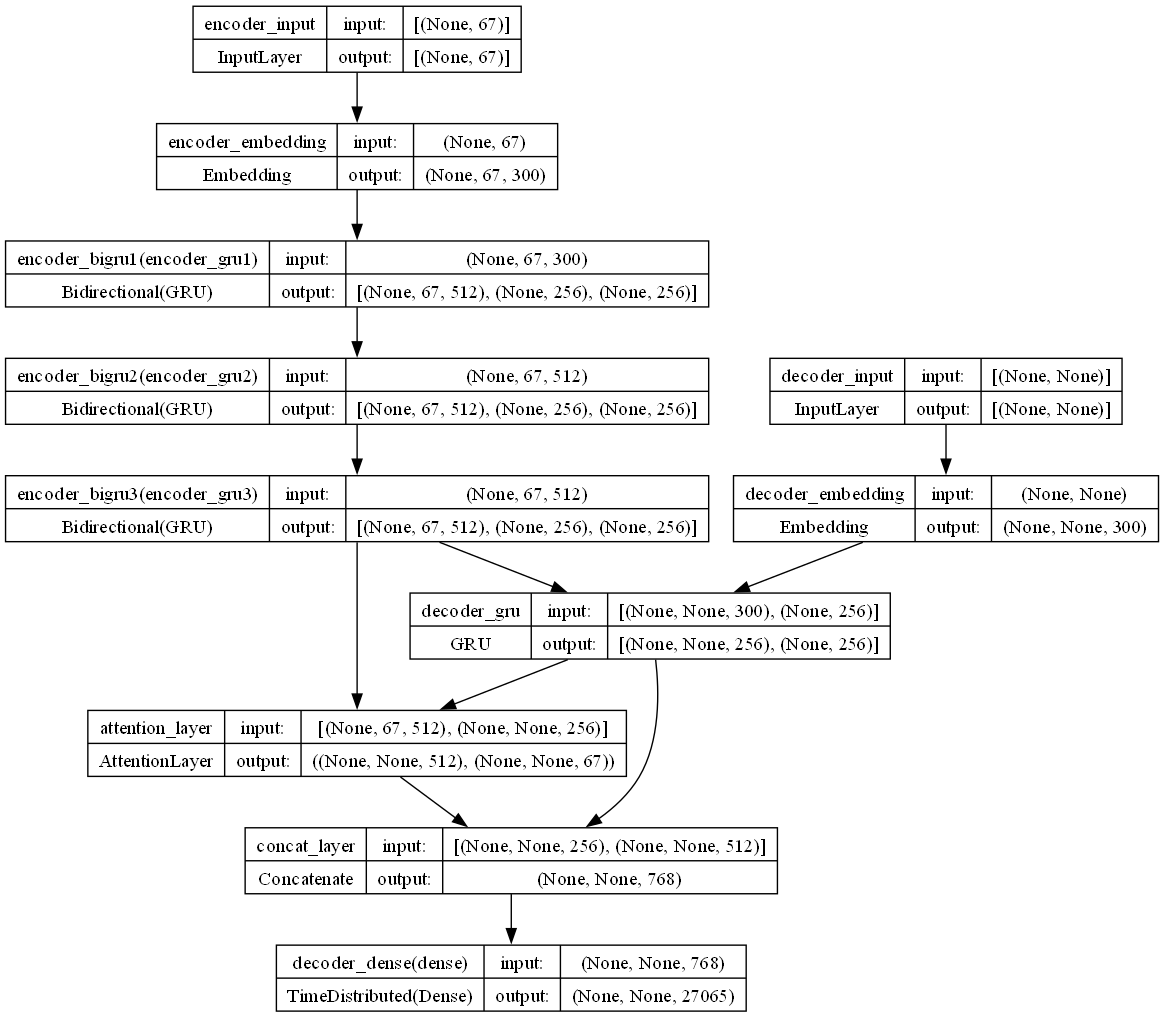

In [6]:
plot_model(HyGRUAtt3,'HyGRUAtt3.png', show_shapes=True, show_layer_names=True, dpi=100)

## HyGRUAtt3 Model Training

In [7]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyGRUAtt3\HyGRUAtt3_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 5
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=2)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Create model instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyGRUAtt3.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train model
start_time = time.time()

historyHyGRUAtt3 = HyGRUAtt3.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/5




1374/1374 [==============================] - ETA: 0s - loss: 4.3847 - accuracy: 0.4557
Epoch 1: val_loss improved from inf to 3.73078, saving model to checkpoints\HyGRUAtt3\HyGRUAtt3_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 9850s 7s/step - loss: 4.3847 - accuracy: 0.4557 - val_loss: 3.7308 - val_accuracy: 0.4929 - lr: 0.0010
Epoch 2/5
1374/1374 [==============================] - ETA: 0s - loss: 3.6119 - accuracy: 0.4918
Epoch 2: val_loss improved from 3.73078 to 3.42068, saving model to checkpoints\HyGRUAtt3\HyGRUAtt3_02.h5
1374/1374 [==============================] - 6024s 4s/step - loss: 3.6119 - accuracy: 0.4918 - val_loss: 3.4207 - val_accuracy: 0.5140 - lr: 0.0010
Epoch 3/5
1374/1374 [==============================] - ETA: 0s - loss: 3.1339 - accuracy: 0.5165
Epoch 3: val_loss improved from 3.42068 to 3.26174, saving model to checkpoints\HyGRUAtt3\HyGRUAtt3_03.h5
1374/1374 [==============================] - 5852s 4s/step - loss: 3.1339 - accuracy: 0.5165 - val_loss: 3.2617 - val_accuracy: 0.5267 - lr: 0.0010
Epoch 4/5
1374/1374 [==============================] - ETA: 0s - loss: 2.7725 - accuracy: 0.5365
Epoch 4: val_loss improved from 3.26174 to 3.20040, s

## HyGRUAtt3 Model Performance

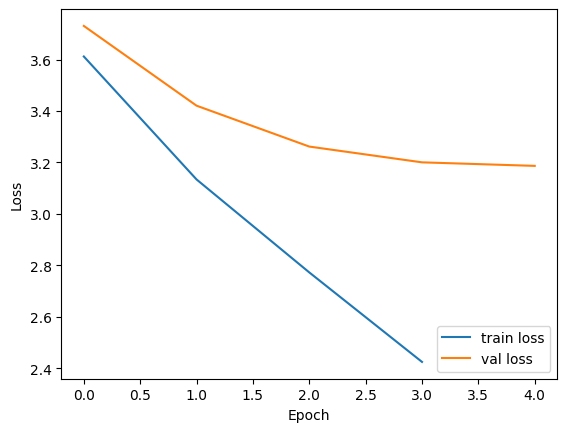

In [9]:
# Loss
plt.plot(historyHyGRUAtt3.history['loss'][1:], label='train loss')
plt.plot(historyHyGRUAtt3.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

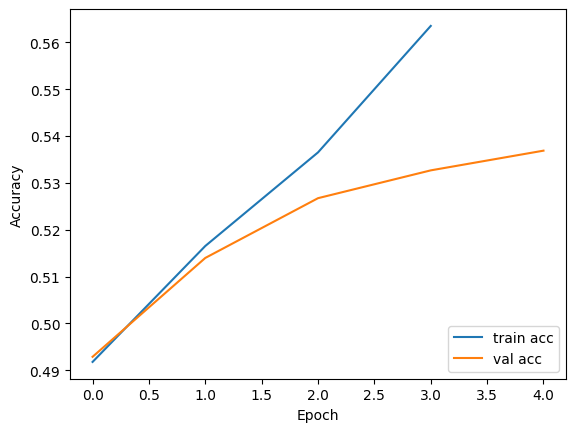

In [10]:
# Accuracy
plt.plot(historyHyGRUAtt3.history['accuracy'][1:], label='train acc')
plt.plot(historyHyGRUAtt3.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyGRUAtt3 Inference

In [11]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [12]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below tensors hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Bi - directional GRU has two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(
    d_emb2, initial_state=decoder_state_fwd_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + [decoder_state_fwd_input_h],
    [decoder_outputs2] + decoder_states)


In [13]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 67, 300)           20577300  
 ng)                                                             
                                                                 
 encoder_bigru1 (Bidirectio  [(None, 67, 512),         857088    
 nal)                         (None, 256),                       
                              (None, 256)]                       
                                                                 
 encoder_bigru2 (Bidirectio  [(None, 67, 512),         1182720   
 nal)                         (None, 256),                       
                              (None, 256)]                       
                                                             

In [14]:
decoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 decoder_gru (GRU)           [(None, None, 256),          428544    ['decoder_embedding[1][0

In [15]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:1])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [16]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [17]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

actual = []
predicted = []

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(0, 10987)
random_sample = random.sample(test_range, 10)
print(random_sample)

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    actualS = actualS.replace('start', '')
    actualS = actualS.replace('end', '')
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

[6272, 9548, 2991, 3576, 2741, 3180, 2775, 1503, 2478, 4642]
1/1 [==============================] - 0s 56ms/step


,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,j k govt orders reopening of ceasefire violations
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man jailed for killing of killing of killing brother in us
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,man arrested for killing of killing of killing of rapists
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,startup makes coats usable as a bottle bottle
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair up raises 500k,startup makes smart strap that can turn into compost
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,estonia s referendum on sale of 21 000 votes
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,sunil gavaskar was the first indian cricketer in the world
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of sonakshi sinha starrer noor released
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms

## HyGRUAtt3 Evaluation

In [18]:
# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAtt3Score = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAtt3ScoreTable = PrettyTable()
HyGRUAtt3ScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAtt3Score.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAtt3ScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAtt3ScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     14.25     |   11.39    | 12.59  |
| ROUGE-2 |      5.95     |    4.36    |  5.01  |
| ROUGE-L |     14.25     |   11.39    | 12.59  |
+---------+---------------+------------+--------+


# TUNING & VALIDATION & FINAL MODEL

## Import library and dataset

In [ ]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import pickle
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
print(tf.version.VERSION)
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, GRU, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Layer
from tensorflow.keras.models import Model
# %pip install pydot
from tensorflow.keras.utils import plot_model
import graphviz
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model

# %pip install pyyaml h5py
import os
import math
import time
import random
# %pip install rouge
from rouge import Rouge
from prettytable import PrettyTable

# Load cleaned data
df = pd.read_csv('cleaned_data.csv')

# Adding START and END tokens for indication
start_token = 'sostok'
end_token = 'eostok'
df.Summary = df.Summary.apply(lambda x: f'{start_token} {x} {end_token}')
for i in range(3):
    print('Article:', df['Article'][i])
    print('Summary:', df['Summary'][i])
    print('\n')

# Get max length of texts and summaries
max_text_len = max([len(text.split()) for text in df['Article']])
max_summary_len = max([len(text.split()) for text in df['Summary']])
print(max_text_len, max_summary_len)

# Splitting data into 80-20 ratio as train and test data
X_train, X_test, y_train, y_test = train_test_split(df['Article'],
                                                    df['Summary'],
                                                    test_size=0.2,
                                                    random_state=24,
                                                    shuffle=True)
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

# Load tokenizers
with open('x_tokenizer', 'rb') as f:
    x_tokenizer = pickle.load(f)
    
with open('y_tokenizer', 'rb') as f:
    y_tokenizer = pickle.load(f)

# One-hot-encoding
x_train_seq = x_tokenizer.texts_to_sequences(X_train)
x_test_seq = x_tokenizer.texts_to_sequences(X_test)

# Padding short texts up to max_text_len
x_train_pad = pad_sequences(x_train_seq, maxlen=max_text_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

# Vocab size of texts
x_vocab_size = len(x_tokenizer.word_index) + 1
print(x_vocab_size)

# One-hot-encoding
y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

# Padding short summaries with 0s
y_train_pad = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test_pad = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

# Vocab size of summaries
y_vocab_size = len(y_tokenizer.word_index) + 1
print(y_vocab_size)


2.15.0
Article: the cbi on saturday booked four former officials of syndicate bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. the accused had availed home loans and credit from syndicate bank on the basis of forged and fabricated documents. these funds were fraudulently transferred to the companies owned by the accused persons.
Summary: sostok 4 ex-bank officials booked for cheating bank of ₹209 crore eostok


Article: chief justice js khehar has said the supreme court will go paperless in six to seven months in a bid to save funds and make the judiciary eco-friendly. he further said the apex court will collect all the records electronically from the lower courts and the high courts so that there is no need to file hard copies.
Summary: sostok supreme court to go paperless in 6 months: cji eostok


Article: at least three people were killed, including a policeman, while 30 others were wounded on saturday evening in two 

# TUNING 1: HyGRUAttAdam20

## HyGRUAttAdam20 Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-GRU layer in the encoder
e_bigru = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name='encoder_gru'),
    name='encoder_bigru')
encoder_output, *encoder_final_states = e_bigru(e_emb)


# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One GRU layer in the decoder
d_gru = GRU(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.3,
    recurrent_dropout=0.2,
    name='decoder_gru')
decoder_output, * \
    decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states[:1])


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

In [ ]:
K.clear_session()

# Create model instance and load the best model weights (model at 4th epoch)
HyGRUAttAdam20 = Model([e_input, d_input], decoder_output, name='HyGRUAttAdam20')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyGRUAttAdam20.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAttAdam20.load_weights('checkpoints/HyGRUAtt/HyGRUAtt_04.h5')


## HyGRUAttAdam20 Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyGRUAtt\HyGRUAttAdam20_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 16 # continue from the 4th epoch
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration 
# is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=3) # increase patience from 2 to 3
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


In [ ]:
# Train model
start_time = time.time()

historyHyGRUAttAdam20 = HyGRUAttAdam20.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/16




1374/1374 [==============================] - ETA: 0s - loss: 1.3870 - accuracy: 0.7170
Epoch 1: val_loss improved from inf to 2.26036, saving model to checkpoints\HyGRUAtt\HyGRUAttAdam20_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 1597s 1s/step - loss: 1.3870 - accuracy: 0.7170 - val_loss: 2.2604 - val_accuracy: 0.6394 - lr: 0.0010
Epoch 2/16
1374/1374 [==============================] - ETA: 0s - loss: 1.0877 - accuracy: 0.7635
Epoch 2: val_loss did not improve from 2.26036
1374/1374 [==============================] - 1542s 1s/step - loss: 1.0877 - accuracy: 0.7635 - val_loss: 2.3009 - val_accuracy: 0.6411 - lr: 0.0010
Epoch 3/16
1374/1374 [==============================] - ETA: 0s - loss: 0.9380 - accuracy: 0.7880
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 3: val_loss did not improve from 2.26036
1374/1374 [==============================] - 2255s 2s/step - loss: 0.9380 - accuracy: 0.7880 - val_loss: 2.3382 - val_accuracy: 0.6416 - lr: 0.0010
Epoch 4/16
1374/1374 [==============================] - ETA: 0s - loss: 0.7115 - accuracy: 0.8340
Epoch 4: val_loss did not improve from 2.26036
1374/1374 [==============================] 

## HyGRUAttAdam20 Model Performance

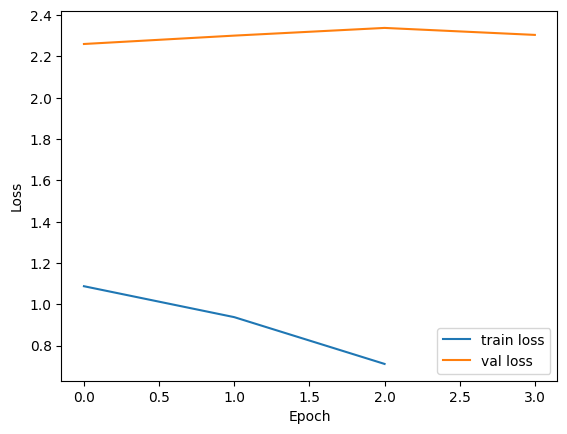

In [ ]:
# Loss
plt.plot(historyHyGRUAttAdam20.history['loss'][1:], label='train loss')
plt.plot(historyHyGRUAttAdam20.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

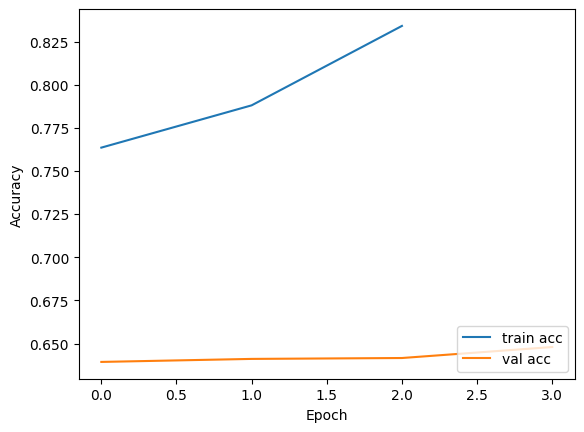

In [ ]:
# Accuracy
plt.plot(historyHyGRUAttAdam20.history['accuracy'][1:], label='train acc')
plt.plot(historyHyGRUAttAdam20.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyGRUAttAdam20 Inference

In [ ]:
K.clear_session()

# Create model instance and load the best model weights (model at 4th epoch)
HyGRUAttAdam20 = Model([e_input, d_input], decoder_output, name='HyGRUAttAdam20')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyGRUAttAdam20.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAttAdam20.load_weights('checkpoints/HyGRUAtt/HyGRUAttAdam20_01.h5')


In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below tensors hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Bi - directional GRU has two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(
    d_emb2, initial_state=decoder_state_fwd_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + [decoder_state_fwd_input_h],
    [decoder_outputs2] + decoder_states)


In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq, verbose = 0)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:1], verbose = 0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

article = seq2text(x_test_pad[random_sample[7]])
actualS = seq2summary(y_test_pad[random_sample[7]])
# print(actualS)
predictedS = decode_sequence(x_test_pad[random_sample[7]].reshape(1, max_text_len))
# print(predicted)

row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born to run out


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

for _, i in enumerate(random_sample[:10]):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,bsf jawans martyred in encounter at bsf convoy
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,canadian man arrested for posting offensive message on social
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,rohit kumar arrested in mumbai on his suicide
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder app share global list of men and women
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair startup raises 500k,mobile repair startup raises 500k
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland invites anti party to form govt s support
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,dhoni s replacement was found dead in mumbai
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born to run out
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli kohli to win more matches than

## HyGRUAttAdam20 Evaluation

In [ ]:
# Predict the rest
actual = []
predicted = []

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)

# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttAdam20Score = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttAdam20ScoreTable = PrettyTable()
HyGRUAttAdam20ScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttAdam20Score.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttAdam20ScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttAdam20ScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     39.15     |   37.54    | 37.74  |
| ROUGE-2 |     15.76     |   15.86    | 15.55  |
| ROUGE-L |     36.79     |   35.29    | 35.47  |
+---------+---------------+------------+--------+


# TUNING 2 & FINAL MODEL: HyGRUAttAdamDropout

## HyGRUAttAdamDropout Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-GRU layer in the encoder
e_bigru = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4, # increase from 0.3 
        recurrent_dropout=0.4,  # increase from 0.2
        name='encoder_gru'),
    name='encoder_bigru')
encoder_output, *encoder_final_states = e_bigru(e_emb)


# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One GRU layer in the decoder
d_gru = GRU(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.4, # increase from 0.3 
    recurrent_dropout=0.2,
    name='decoder_gru')
decoder_output, * \
    decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states[:1])


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

In [ ]:
K.clear_session()

# Create model instance
HyGRUAttAdamDropout = Model([e_input, d_input], decoder_output, name='HyGRUAttAdamDropout')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyGRUAttAdamDropout.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## HyGRUAttAdamDropout Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyGRUAtt\HyGRUAttAdamDropout_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 20
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


In [ ]:
# Train model
start_time = time.time()

historyHyGRUAttAdamDropout= HyGRUAttAdamDropout.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/20


1374/1374 [==============================] - ETA: 0s - loss: 4.0908 - accuracy: 0.4735
Epoch 1: val_loss improved from inf to 3.05324, saving model to checkpoints\HyGRUAtt\HyGRUAttAdamDropout_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 2049s 1s/step - loss: 4.0908 - accuracy: 0.4735 - val_loss: 3.0532 - val_accuracy: 0.5428 - lr: 0.0010
Epoch 2/20
1374/1374 [==============================] - ETA: 0s - loss: 2.7803 - accuracy: 0.5600
Epoch 2: val_loss improved from 3.05324 to 2.50531, saving model to checkpoints\HyGRUAtt\HyGRUAttAdamDropout_02.h5
1374/1374 [==============================] - 1707s 1s/step - loss: 2.7803 - accuracy: 0.5600 - val_loss: 2.5053 - val_accuracy: 0.6002 - lr: 0.0010
Epoch 3/20
1374/1374 [==============================] - ETA: 0s - loss: 2.0874 - accuracy: 0.6194
Epoch 3: val_loss improved from 2.50531 to 2.36926, saving model to checkpoints\HyGRUAtt\HyGRUAttAdamDropout_03.h5
1374/1374 [==============================] - 2614s 2s/step - loss: 2.0874 - accuracy: 0.6194 - val_loss: 2.3693 - val_accuracy: 0.6171 - lr: 0.0010
Epoch 4/20
1374/1374 [==============================] - ETA: 0s - loss: 1.6497 - accuracy: 0.6722
Epoch 4: val_loss improved from 

## HyGRUAttAdamDropout Model Performance

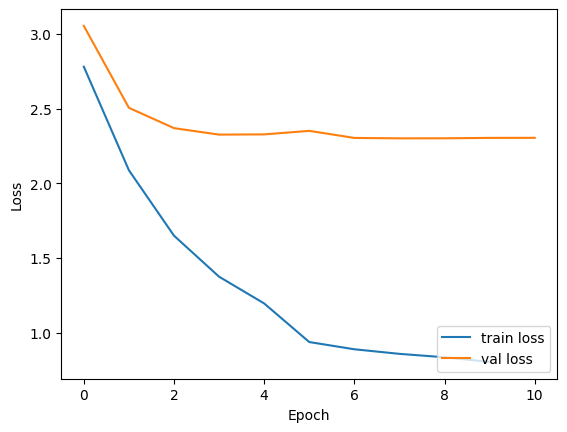

In [ ]:
# Loss
plt.plot(historyHyGRUAttAdamDropout.history['loss'][1:], label='train loss')
plt.plot(historyHyGRUAttAdamDropout.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

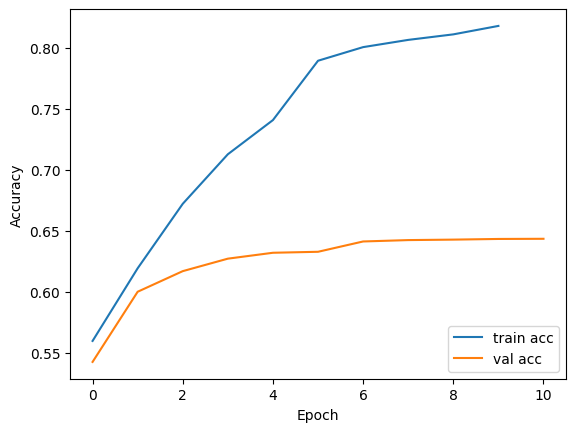

In [ ]:
# Accuracy
plt.plot(historyHyGRUAttAdamDropout.history['accuracy'][1:], label='train acc')
plt.plot(historyHyGRUAttAdamDropout.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyGRUAttAdamDropout Inference

In [ ]:
K.clear_session()

# Create model instance and load the best model weights (model at 4th epoch)
HyGRUAttAdamDropout = Model([e_input, d_input], decoder_output, name='HyGRUAttAdamDropout')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
HyGRUAttAdamDropout.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAttAdamDropout.load_weights('checkpoints/HyGRUAtt/HyGRUAttAdamDropout_08.h5')


In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below tensors hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Bi - directional GRU has two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(
    d_emb2, initial_state=decoder_state_fwd_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + [decoder_state_fwd_input_h],
    [decoder_outputs2] + decoder_states)


In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq, verbose = 0)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:1], verbose = 0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

article = seq2text(x_test_pad[random_sample[7]])
actualS = seq2summary(y_test_pad[random_sample[7]])
# print(actualS)
predictedS = decode_sequence(x_test_pad[random_sample[7]].reshape(1, max_text_len))
# print(predicted)

row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born to run out


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

for _, i in enumerate(random_sample[:10]):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,3 bsf jawans martyred in j k encounter
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man arrested for posting comment on facebook
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,police player arrested in mumbai over husband s suicide
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder social users share selfies of men women
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair startup raises 500k,quikr raises 500 000 via internet in funding
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland prez invites anti party to form govt
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,india s u 19 cricket team found dead in hotel room
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born to run out
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli will win more than ipl dhoni
9,t

## HyGRUAttAdamDropout Evaluation

In [ ]:
# Predict the rest of the samples
actual = []
predicted = []

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)

# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttAdamDropoutScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttAdamDropoutScoreTable = PrettyTable()
HyGRUAttAdamDropoutScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttAdamDropoutScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttAdamDropoutScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttAdamDropoutScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     40.16     |   38.88    | 38.95  |
| ROUGE-2 |     16.66     |   16.74    | 16.44  |
| ROUGE-L |     37.76     |   36.56    | 36.62  |
+---------+---------------+------------+--------+


In [ ]:
# Predict the full test set
actual = []
predicted = []

for i in range(len(X_test)):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)

# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttAdamDropoutScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttAdamDropoutScoreTable = PrettyTable()
HyGRUAttAdamDropoutScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttAdamDropoutScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttAdamDropoutScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttAdamDropoutScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     40.41     |   39.00    | 39.13  |
| ROUGE-2 |     16.67     |   16.68    | 16.41  |
| ROUGE-L |     37.92     |   36.60    | 36.72  |
+---------+---------------+------------+--------+


## Final Model Visualization

In [ ]:
# Final model architecture
plot_model(HyGRUAttAdamDropout,'HyGRUAttAdamDropout.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True, dpi=100)
HyGRUAttAdamDropout.summary()

Model: "HyGRUAttAdamDropout"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 67)]                 0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 67, 300)              2057730   ['encoder_input[0][0]']       
 ng)                                                      0                                       
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_in

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 67)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 67, 300)           20577300  
 ng)                                                             
                                                                 
 encoder_bigru (Bidirection  [(None, 67, 512),         857088    
 al)                          (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 21434388 (81.77 MB)
Trainable params: 857088 (3.27 MB)
Non-trainable params: 20577300 (78.50 MB)
_________________________________________________________________


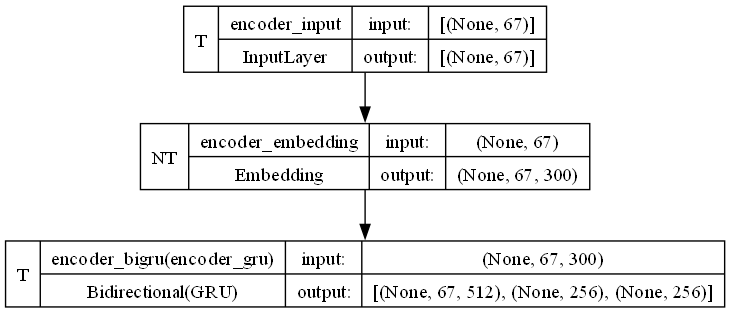

In [ ]:
encoder_model.summary()
plot_model(encoder_model, show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True, dpi=100)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            8119500   ['decoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 decoder_gru (GRU)           [(None, None, 256),          428544    ['decoder_embedding[1][0

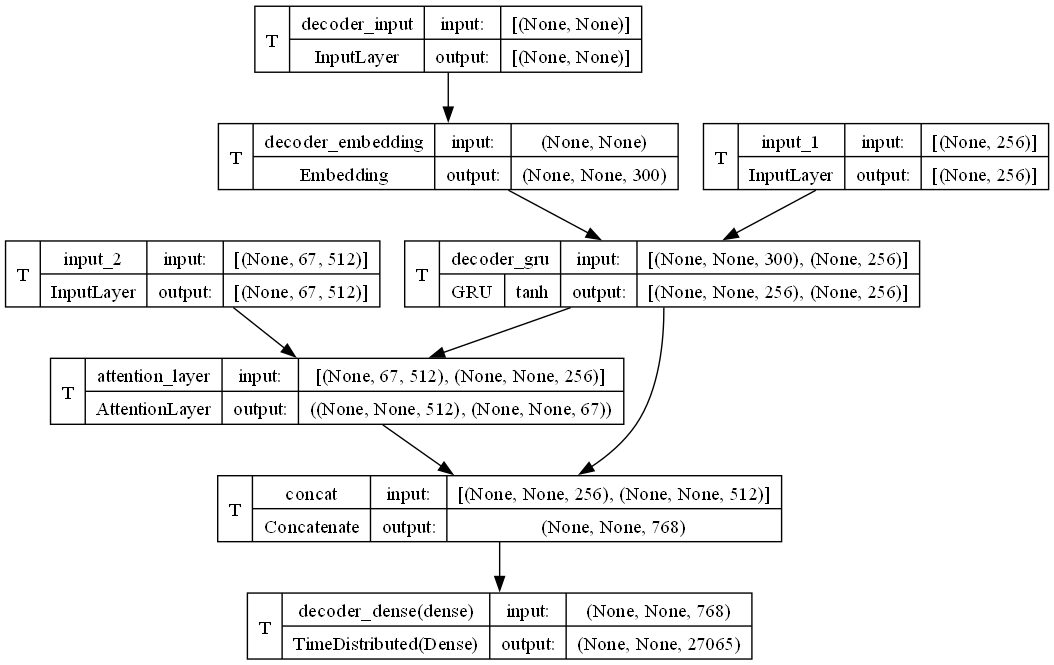

In [ ]:
decoder_model.summary()
plot_model(decoder_model, show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True, dpi=100)

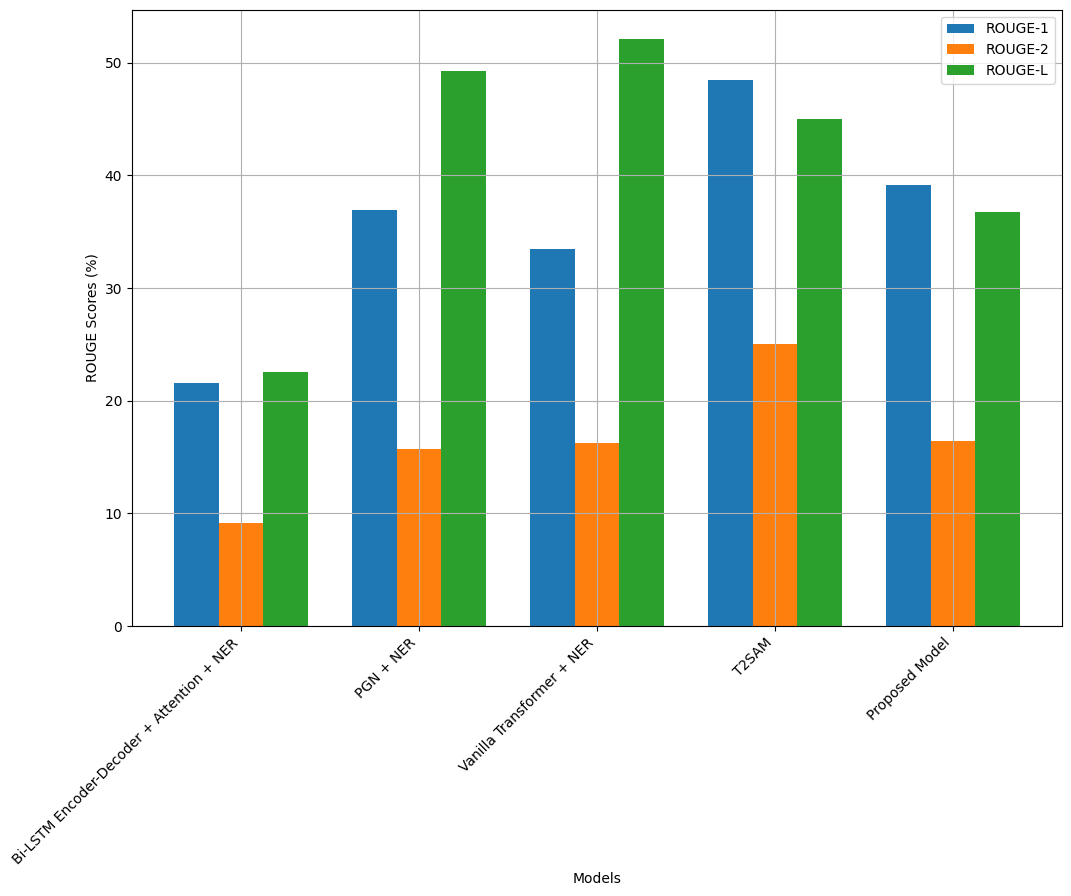

In [ ]:
# ROUGE comparison
models = ['Bi-LSTM Encoder-Decoder + Attention + NER', 'PGN + NER', 'Vanilla Transformer + NER', 'T2SAM', 'Proposed Model']
rouge1 = [21.60, 36.90, 33.50, 48.50, 39.13]
rouge2 = [9.10, 15.70, 16.20, 25.00, 16.41]
rougeL = [22.50, 49.30, 52.10, 45.00, 36.72]

bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 8))

plt.bar(index - bar_width, rouge1, width=bar_width, label='ROUGE-1')
plt.bar(index, rouge2, width=bar_width, label='ROUGE-2')
plt.bar(index + bar_width, rougeL, width=bar_width, label='ROUGE-L')

plt.xlabel('Models')
plt.ylabel('ROUGE Scores (%)')
plt.xticks(index, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# TUNING 3: HyGRUAttAdagrad

## HyGRUAttAdagrad Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-GRU layer in the encoder
e_bigru = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4, # increase from 0.3 
        recurrent_dropout=0.4,  # increase from 0.2
        name='encoder_gru'),
    name='encoder_bigru')
encoder_output, *encoder_final_states = e_bigru(e_emb)


# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One GRU layer in the decoder
d_gru = GRU(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.4, # increase from 0.3 
    recurrent_dropout=0.2,
    name='decoder_gru')
decoder_output, * \
    decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states[:1])


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

In [ ]:
K.clear_session()

# Create model instance
HyGRUAttAdagrad = Model([e_input, d_input], decoder_output, name='HyGRUAttAdagrad')

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
HyGRUAttAdagrad.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## HyGRUAttAdagrad Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyGRUAtt\HyGRUAttAdagrad_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 20
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


In [ ]:
# Train model
start_time = time.time()

historyHyGRUAttAdagrad = HyGRUAttAdagrad.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/20
1374/1374 [==============================] - ETA: 0s - loss: 7.9751 - accuracy: 0.3514
Epoch 1: val_loss improved from inf to 6.28206, saving model to checkpoints\HyGRUAtt\HyGRUAttAdagrad_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 3263s 2s/step - loss: 7.9751 - accuracy: 0.3514 - val_loss: 6.2821 - val_accuracy: 0.3737 - lr: 0.0010
Epoch 2/20
1374/1374 [==============================] - ETA: 0s - loss: 6.2259 - accuracy: 0.3587
Epoch 2: val_loss improved from 6.28206 to 5.83902, saving model to checkpoints\HyGRUAtt\HyGRUAttAdagrad_02.h5
1374/1374 [==============================] - 3183s 2s/step - loss: 6.2259 - accuracy: 0.3587 - val_loss: 5.8390 - val_accuracy: 0.3790 - lr: 0.0010
Epoch 3/20
1374/1374 [==============================] - ETA: 0s - loss: 5.8513 - accuracy: 0.3735
Epoch 3: val_loss improved from 5.83902 to 5.47501, saving model to checkpoints\HyGRUAtt\HyGRUAttAdagrad_03.h5
1374/1374 [==============================] - 3119s 2s/step - loss: 5.8513 - accuracy: 0.3735 - val_loss: 5.4750 - val_accuracy: 0.4009 - lr: 0.0010
Epoch 4/20
1374/1374 [==============================] - ETA: 0s - loss: 5.5336 - accuracy: 0.3866
Epoch 4: val_loss improved from 5.47501 

## HyGRUAttAdagrad Model Performance

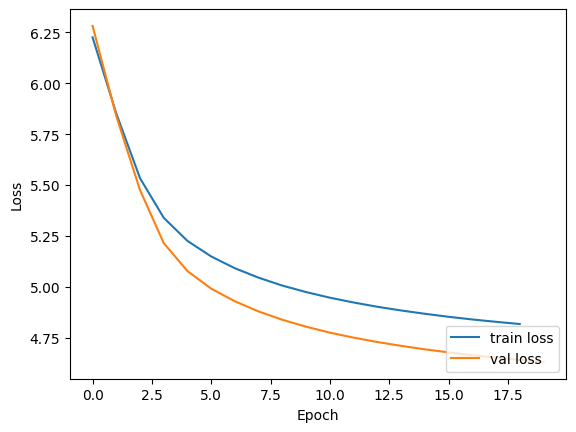

In [ ]:
# Loss
plt.plot(historyHyGRUAttAdagrad.history['loss'][1:], label='train loss')
plt.plot(historyHyGRUAttAdagrad.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

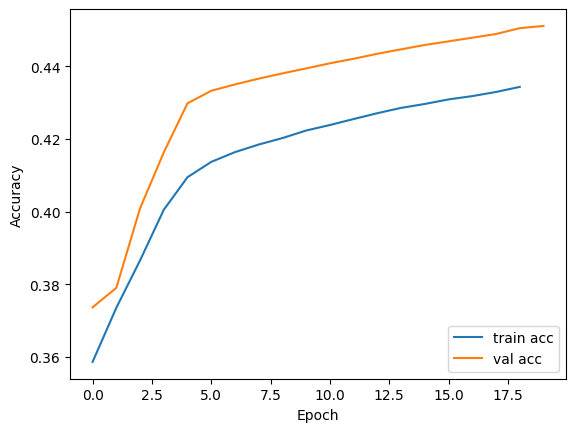

In [ ]:
# Accuracy
plt.plot(historyHyGRUAttAdagrad.history['accuracy'][1:], label='train acc')
plt.plot(historyHyGRUAttAdagrad.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyGRUAttAdagrad Inference

In [ ]:
K.clear_session()

# Create model instance and load the best model weights (model at 4th epoch)
HyGRUAttAdagrad = Model([e_input, d_input], decoder_output, name='HyGRUAttAdagrad')

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
HyGRUAttAdagrad.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAttAdagrad.load_weights('checkpoints/HyGRUAtt/HyGRUAttAdagrad_20.h5')


In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below tensors hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Bi - directional GRU has two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(
    d_emb2, initial_state=decoder_state_fwd_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + [decoder_state_fwd_input_h],
    [decoder_outputs2] + decoder_states)


In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq, verbose = 0)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:1], verbose = 0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

article = seq2text(x_test_pad[random_sample[7]])
actualS = seq2summary(y_test_pad[random_sample[7]])
# print(actualS)
predictedS = decode_sequence(x_test_pad[random_sample[7]].reshape(1, max_text_len))
# print(predicted)

row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,india to to to to to to in in


## HyGRUAttAdagrad Evaluation

In [ ]:
# Predict the rest of the samples
actual = []
predicted = []

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)

# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttAdagradScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttAdagradScoreTable = PrettyTable()
HyGRUAttAdagradScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttAdagradScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttAdagradScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttAdagradScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     19.97     |    6.27    |  9.44  |
| ROUGE-2 |      0.08     |    0.03    |  0.04  |
| ROUGE-L |     19.28     |    6.05    |  9.11  |
+---------+---------------+------------+--------+


# TUNING 4: HyGRUAttRMSprop

## HyGRUAttRMSprop Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-GRU layer in the encoder
e_bigru = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4, # increase from 0.3 
        recurrent_dropout=0.4,  # increase from 0.2
        name='encoder_gru'),
    name='encoder_bigru')
encoder_output, *encoder_final_states = e_bigru(e_emb)


# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One GRU layer in the decoder
d_gru = GRU(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.4, # increase from 0.3 
    recurrent_dropout=0.2,
    name='decoder_gru')
decoder_output, * \
    decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states[:1])


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

In [ ]:
K.clear_session()

# Create model instance
HyGRUAttRMSprop = Model([e_input, d_input], decoder_output, name='HyGRUAttRMSprop')

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
HyGRUAttRMSprop.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## HyGRUAttRMSprop Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyGRUAtt\HyGRUAttRMSprop_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 20
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


In [ ]:
# Train model
start_time = time.time()

historyHyGRUAttRMSprop = HyGRUAttRMSprop.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/20


1374/1374 [==============================] - ETA: 0s - loss: 4.4890 - accuracy: 0.4515
Epoch 1: val_loss improved from inf to 3.84895, saving model to checkpoints\HyGRUAtt\HyGRUAttRMSprop_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 2047s 1s/step - loss: 4.4890 - accuracy: 0.4515 - val_loss: 3.8490 - val_accuracy: 0.4896 - lr: 0.0010
Epoch 2/20
1374/1374 [==============================] - ETA: 0s - loss: 3.7927 - accuracy: 0.4898
Epoch 2: val_loss improved from 3.84895 to 3.45824, saving model to checkpoints\HyGRUAtt\HyGRUAttRMSprop_02.h5
1374/1374 [==============================] - 1914s 1s/step - loss: 3.7927 - accuracy: 0.4898 - val_loss: 3.4582 - val_accuracy: 0.5170 - lr: 0.0010
Epoch 3/20
1374/1374 [==============================] - ETA: 0s - loss: 3.3983 - accuracy: 0.5171
Epoch 3: val_loss improved from 3.45824 to 3.17385, saving model to checkpoints\HyGRUAtt\HyGRUAttRMSprop_03.h5
1374/1374 [==============================] - 1823s 1s/step - loss: 3.3983 - accuracy: 0.5171 - val_loss: 3.1738 - val_accuracy: 0.5430 - lr: 0.0010
Epoch 4/20
1374/1374 [==============================] - ETA: 0s - loss: 3.0821 - accuracy: 0.5433
Epoch 4: val_loss improved from 3.17385 

## HyGRUAttRMSprop Model Performance

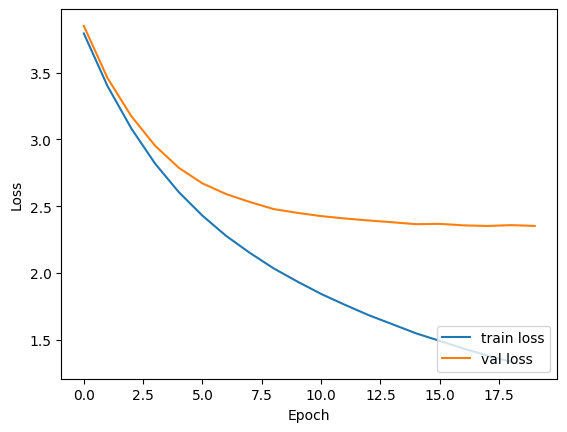

In [ ]:
# Loss
plt.plot(historyHyGRUAttRMSprop.history['loss'][1:], label='train loss')
plt.plot(historyHyGRUAttRMSprop.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

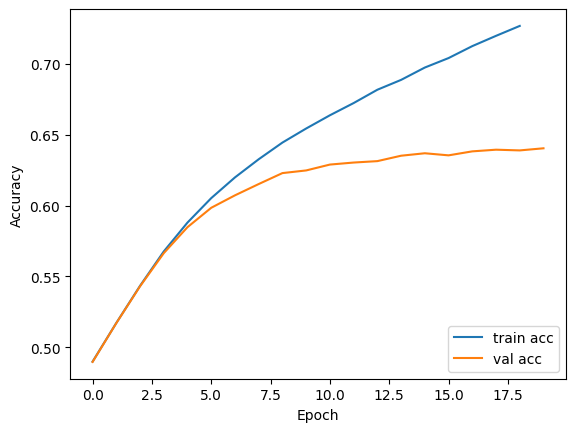

In [ ]:
# Accuracy
plt.plot(historyHyGRUAttRMSprop.history['accuracy'][1:], label='train acc')
plt.plot(historyHyGRUAttRMSprop.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyGRUAttRMSprop Inference

In [ ]:
K.clear_session()

# Create model instance
HyGRUAttRMSprop = Model([e_input, d_input], decoder_output, name='HyGRUAttRMSprop')

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
HyGRUAttRMSprop.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAttRMSprop.load_weights('checkpoints/HyGRUAtt/HyGRUAttRMSprop_18.h5')


In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below tensors hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Bi - directional GRU has two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(
    d_emb2, initial_state=decoder_state_fwd_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + [decoder_state_fwd_input_h],
    [decoder_outputs2] + decoder_states)


In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq, verbose = 0)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:1], verbose = 0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

article = seq2text(x_test_pad[random_sample[7]])
actualS = seq2summary(y_test_pad[random_sample[7]])
# print(actualS)
predictedS = decode_sequence(x_test_pad[random_sample[7]].reshape(1, max_text_len))
# print(predicted)

row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of film on the first film sports film


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

for _, i in enumerate(random_sample[:10]):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,3 bsf men killed in bsf firing at bsf convoy
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man arrested for posting racist message on twitter
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,indian kabaddi player arrested for his wife
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder partners most right swiped
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair startup raises 500k,quikr raises 500k in second round of funding
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland invites anti democratic party to form govt
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,manish pandey s the sense of india s u 19 cricket team found dead
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of film on the first film sports film
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli to win more matche

## HyGRUAttRMSprop Evaluation

In [ ]:
# Predict the rest of the samples
actual = []
predicted = []

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)

# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttRMSpropScore = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttRMSpropScoreTable = PrettyTable()
HyGRUAttRMSpropScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttRMSpropScore.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttRMSpropScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttRMSpropScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     38.90     |   37.35    | 37.53  |
| ROUGE-2 |     15.83     |   15.84    | 15.56  |
| ROUGE-L |     36.53     |   35.09    | 35.25  |
+---------+---------------+------------+--------+


# TUNING 5: HyGRUAttRMSprop50

## HyGRUAttRMSprop50 Model Architecture

### Additive/Bahdanau Attention (https://arxiv.org/pdf/1409.0473.pdf)

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):

        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### Encoder-Decoder

In [ ]:
# Initialize parameters
x_embedding_matrix = np.load('x_embedding_matrix.npy')
y_embedding_matrix = np.load('y_embedding_matrix.npy')
embedding_dim = 300 # Size of word embeddings
latent_dim = 256 # Number of neurons in RNN layer

In [ ]:
# BI-GRU ENCODER ----------------------------------------------------------------------
e_input = Input(shape=(max_text_len, ), name='encoder_input')

# Embedding Layer
e_emb = Embedding(x_vocab_size,
                  embedding_dim,
                  embeddings_initializer=tf.keras.initializers.Constant(
                      x_embedding_matrix),
                  trainable=False,
                  name='encoder_embedding')(e_input)

# One Bi-GRU layer in the encoder
e_bigru = Bidirectional(
    GRU(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4, # increase from 0.3 
        recurrent_dropout=0.4,  # increase from 0.2
        name='encoder_gru'),
    name='encoder_bigru')
encoder_output, *encoder_final_states = e_bigru(e_emb)


# GRU DECODER ----------------------------------------------------------------------
d_input = Input(shape=(None,), name='decoder_input')

# Embedding layer
d_emb_layer = Embedding(y_vocab_size,
                        embedding_dim,
                        embeddings_initializer=tf.keras.initializers.Constant(
                            y_embedding_matrix),
                        trainable=True,
                        name='decoder_embedding')
d_emb = d_emb_layer(d_input)

# One GRU layer in the decoder
d_gru = GRU(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.4, # increase from 0.3 
    recurrent_dropout=0.2,
    name='decoder_gru')
decoder_output, * \
    decoder_final_states = d_gru(d_emb, initial_state=encoder_final_states[:1])


# ATTENTION LAYER --------------------------------------------------------------
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_output, decoder_output])


# CONCATENATION LAYER --------------------------------------------------------------
# Concatenating attention output and decoder GRU output
decoder_concat_input = Concatenate(
    axis=-1, name='concat_layer')([decoder_output, attn_out])


# DENSE TIME DISTRIBUTED LAYER -------------------------------------------------
# With softmax function for predicting the next word
decoder_dense = TimeDistributed(
    Dense(y_vocab_size, activation='softmax'), name='decoder_dense')
decoder_output = decoder_dense(decoder_concat_input)

In [ ]:
K.clear_session()

# Create model instance
HyGRUAttRMSprop50 = Model([e_input, d_input], decoder_output, name='HyGRUAttRMSprop50')

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
HyGRUAttRMSprop50.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAttRMSprop50.load_weights('checkpoints/HyGRUAtt/HyGRUAttRMSprop_18.h5')


## HyGRUAttRMSprop50 Model Training

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = r"checkpoints\HyGRUAtt\HyGRUAttRMSprop50_{epoch:02d}.h5"

# Training hyperparameters
num_epochs = 32 # starting from the 18th epoch
batch_size = 32

# Create a callback that saves the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

# Training the model with Early Stopping and ReduceLROnPlateau callback on val_loss
# The model training is stopped if validation loss for the current iteration 
# is higher than the validation loss for the previous iteration
# The learning rate is reduced when validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


In [ ]:
# Train model
start_time = time.time()

historyHyGRUAttRMSprop50 = HyGRUAttRMSprop50.fit([x_train_pad, y_train_pad[:, :-1]],
                             y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:, 1:],
                             epochs=num_epochs,
                             batch_size=batch_size,
                             callbacks=callbacks,
                             validation_data=
                              ([x_test_pad, y_test_pad[:, :-1]],
                               y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:, 1:]))

end_time = time.time()
total_time = end_time - start_time

# Print total time taken
print('Total time taken: {:.2f} sec'.format(total_time))

Epoch 1/32


1374/1374 [==============================] - ETA: 0s - loss: 1.3838 - accuracy: 0.7196
Epoch 1: val_loss improved from inf to 2.35401, saving model to checkpoints\HyGRUAtt\HyGRUAttRMSprop50_01.h5


c:\Users\ellae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1374/1374 [==============================] - 2807s 2s/step - loss: 1.3838 - accuracy: 0.7196 - val_loss: 2.3540 - val_accuracy: 0.6392 - lr: 0.0010
Epoch 2/32
1374/1374 [==============================] - ETA: 0s - loss: 1.3353 - accuracy: 0.7272
Epoch 2: val_loss improved from 2.35401 to 2.35296, saving model to checkpoints\HyGRUAtt\HyGRUAttRMSprop50_02.h5
1374/1374 [==============================] - 3085s 2s/step - loss: 1.3353 - accuracy: 0.7272 - val_loss: 2.3530 - val_accuracy: 0.6407 - lr: 0.0010
Epoch 3/32
1374/1374 [==============================] - ETA: 0s - loss: 1.2891 - accuracy: 0.7342
Epoch 3: val_loss did not improve from 2.35296
1374/1374 [==============================] - 3020s 2s/step - loss: 1.2891 - accuracy: 0.7342 - val_loss: 2.3589 - val_accuracy: 0.6412 - lr: 0.0010
Epoch 4/32
1374/1374 [==============================] - ETA: 0s - loss: 1.2473 - accuracy: 0.7411
Epoch 4: val_loss improved from 2.35296 to 2.35174, saving model to checkpoints\HyGRUAtt\HyGRUAttRMSpr

## HyGRUAttRMSprop50 Model Performance

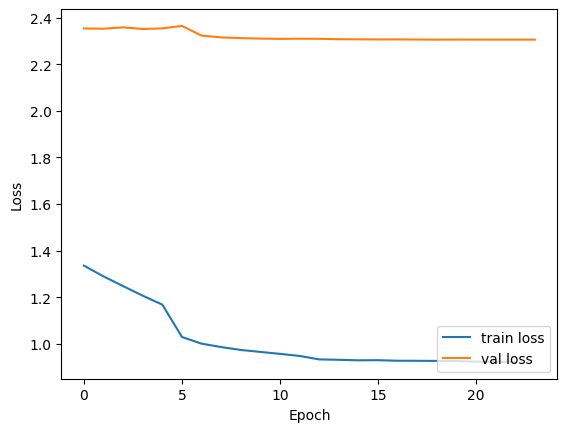

In [ ]:
# Loss
plt.plot(historyHyGRUAttRMSprop50.history['loss'][1:], label='train loss')
plt.plot(historyHyGRUAttRMSprop50.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

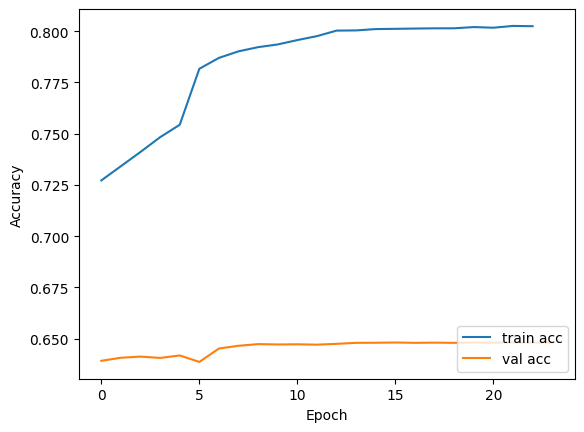

In [ ]:
# Accuracy
plt.plot(historyHyGRUAttRMSprop50.history['accuracy'][1:], label='train acc')
plt.plot(historyHyGRUAttRMSprop50.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## HyGRUAttRMSprop50 Inference

In [ ]:
K.clear_session()

# Create model instance
HyGRUAttRMSprop50 = Model([e_input, d_input], decoder_output, name='HyGRUAttRMSprop50')

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
HyGRUAttRMSprop50.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
HyGRUAttRMSprop50.load_weights('checkpoints/HyGRUAtt/HyGRUAttRMSprop50_19.h5')


In [ ]:
# Building dictionary for target and source words, to convert the index to word
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder Inference
encoder_model = Model(inputs=e_input, 
                      outputs=[encoder_output] + encoder_final_states)

# Decoder Inference
# Below tensors hold the states of the previous time step
decoder_state_fwd_input_h = Input(shape=(latent_dim,))

# Create the hidden input layer with twice the latent dimension
# Bi - directional GRU has two hidden states
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim * 2))

# Get the embeddings of the decoder sequence
d_emb2 = d_emb_layer(d_input)

# Predicting the next word in the sequence
# Setting the initial states to the previous time step states
decoder_outputs2, *decoder_states = d_gru(
    d_emb2, initial_state=decoder_state_fwd_input_h)

# Attention Inference
attn_out_inf, attn_states_inf = attn_layer(
    [decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(
    axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Dense softmax layer to calculate probability distribution over target vocab
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final Decoder model
decoder_model = Model(
    [d_input] + [decoder_hidden_state_input] + [decoder_state_fwd_input_h],
    [decoder_outputs2] + decoder_states)


In [ ]:
# Function to generate output summaries
def decode_sequence(input_seq):
    # Encoding input as state vectors
    e_out, *state_values = encoder_model.predict(input_seq, verbose = 0)

    # Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))

    # Taking the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict([target_seq] + [e_out] + state_values[:1], verbose = 0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token
        
        # Exit condition: either hit max length or find stop word
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [ ]:
def seq2summary(input_seq):
    new_string = ''
    for i in input_seq:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string

def seq2text(input_seq):
    new_string = ''
    for i in input_seq:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

article = seq2text(x_test_pad[random_sample[7]])
actualS = seq2summary(y_test_pad[random_sample[7]])
# print(actualS)
predictedS = decode_sequence(x_test_pad[random_sample[7]].reshape(1, max_text_len))
# print(predicted)

row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born to run out


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
dfResult = pd.DataFrame(columns=['Article', 'Actual Summary', 'Predicted Summary'])

# print(range(len(y_test[:1])))
random.seed(24)
test_range = range(10987)
random_sample = random.sample(test_range, 5494)
# print(random_sample)

for _, i in enumerate(random_sample[:10]):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    # print(predicted)

    row = {'Article': article, 'Actual Summary': actualS, 'Predicted Summary': predictedS}
    dfResult = pd.concat([dfResult, pd.DataFrame([row], columns=dfResult.columns)], ignore_index=True)

display(dfResult)

,Article,Actual Summary,Predicted Summary
0,three border security force bsf personnel were killed and 12 others injured when hizbul mujahideen militants opened fire at a bsf convoy in bijbehara town jammu and kashmir on friday officials said the attack took place at when the convoy was on its way to srinagar the army and police have launched an operation to track the militants,3 bsf personnel killed in hizbul attack in j k,3 militants killed in j k encounter
1,a canadian man robert penner was arrested in nepal on monday for posting a provocative message on twitter aimed at spreading social discord he was handed over to immigration officials who did not reveal who had made the complaint according to reports penner has been living in nepal for the last two years and writes frequently on political issues,nepal arrests canadian over tweets,man arrested for posting racist message on twitter
2,national kabaddi player rohit kumar was arrested by the delhi police in mumbai on friday following his wife s suicide in the capital earlier this week kumar who plays for bengaluru bulls in the pro kabaddi league was accused of harassment by his wife in her suicide note a case of dowry death and harassment is registered against kumar and his parents,national player arrested over wife’s suicide,rape accused in mumbai police chief arrested
3,dating app tinder on wednesday shared a global list of most right swiped profiles of men and women on the basis of their profession while pilots entrepreneurs and firefighters were most right swiped amongst men physical therapists interior designers and entrepreneurs were amongst the most right swiped women tinder in november 2015 introduced the feature to add profession to a user s profile,tinder reveals list of most right swiped jobs,tinder of men women women are right swiped
4,online platform for smartphone repair has raised 500 000 via letsventure in its second round of funding founded in 2014 the startup repairs gadgets like smartphones and tablets within claimed 48 hours it also offers other services like free pickup and drop standby replacement phone and after service warranty,smartphone repair startup raises 500k,line raises 500k in its second round of funding
5,iceland s president guðni jóhannesson has invited the anti establishment pirate party to form the government after the rightwing and parties failed in their bids the small pirate party which won 14 5 of the votes had vowed during the election campaign to implement radical institutional reforms for more direct democracy and greater transparency in public life,pirate party invited to form iceland government,iceland s president invites anti democratic party
6,rajesh sawant the strength and conditioning trainer of india s u 19 cricket team was found dead in his hotel room in mumbai on sunday bcci joint secretary amitabh choudhary said the incident came to light when sawant did not report for the team s practice session in the morning the 40 year old was working under the u 19 team coach rahul dravid,india a and u 19 trainer found dead in his hotel room,rajesh khanna s head found dead in mumbai
7,the trailer for the upcoming biographical sports film budhia singh born to run has been released it is based on budhia singh who ran 48 marathons and featured as the world s youngest marathon runner in the limca book of records starring manoj bajpayee as budhia s coach and mayur patole as the titular character the film will release on august 5,trailer of budhia singh born to run out,trailer of budhia singh born to run out
8,in his first conference after resigning as india s limited overs captain ms dhoni said virat kohli will win more matches than he did virat and his team will win more games than me in all formats it will be the most successful indian team ever he said dhoni captained india in 199 odis winning 110 the most in indian cricket history,virat and his team will win more games than me ms dhoni,kohli will win more than ipl than me dhoni
9,the fi

## HyGRUAttRMSprop50 Evaluation

In [ ]:
# Predict the rest of the samples
actual = []
predicted = []

for _, i in enumerate(random_sample):
    article = seq2text(x_test_pad[i])
    actualS = seq2summary(y_test_pad[i])
    # print(actualS)
    actual.append(actualS)
    predictedS = decode_sequence(x_test_pad[i].reshape(1, max_text_len))
    predicted.append(predictedS)

# Remove white spaces
actual = [text.strip() for text in actual]
predicted = [text.strip() for text in predicted]
# print(actual)
# print(predicted)

# Initialize Rouge
rouge = Rouge()

# Get scores
HyGRUAttRMSprop50Score = rouge.get_scores(predicted, actual, avg = True)

# Create a PrettyTable
HyGRUAttRMSprop50ScoreTable = PrettyTable()
HyGRUAttRMSprop50ScoreTable.field_names = ["Metric", "Precision (%)", "Recall (%)", "F1 (%)"]

# Add rows to the table
for metric, values in HyGRUAttRMSprop50Score.items():
    precision_percent = values['p'] * 100
    recall_percent = values['r'] * 100
    f1_percent = values['f'] * 100

    # Add row to the table
    HyGRUAttRMSprop50ScoreTable.add_row([metric.upper(), f"{precision_percent:.2f}", f"{recall_percent:.2f}", f"{f1_percent:.2f}"])

# Print the table
print(HyGRUAttRMSprop50ScoreTable)

+---------+---------------+------------+--------+
|  Metric | Precision (%) | Recall (%) | F1 (%) |
+---------+---------------+------------+--------+
| ROUGE-1 |     39.72     |   38.85    | 38.70  |
| ROUGE-2 |     16.84     |   17.05    | 16.66  |
| ROUGE-L |     37.41     |   36.58    | 36.45  |
+---------+---------------+------------+--------+
